In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
# Specify the path to the Common Voice dataset
dataset_path = 'F:/cv-corpus-7.0-2021-07-21/en'

In [8]:
# Read the CSV file containing the metadata of the Common Voice dataset
metadata_path = f'{dataset_path}/train.tsv'
metadata_df = pd.read_csv(metadata_path, sep='\t')

In [9]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [10]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

In [11]:
metadata_df.groupby("gender")["gender"].unique()

gender
female    [female]
male        [male]
other      [other]
Name: gender, dtype: object

In [12]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


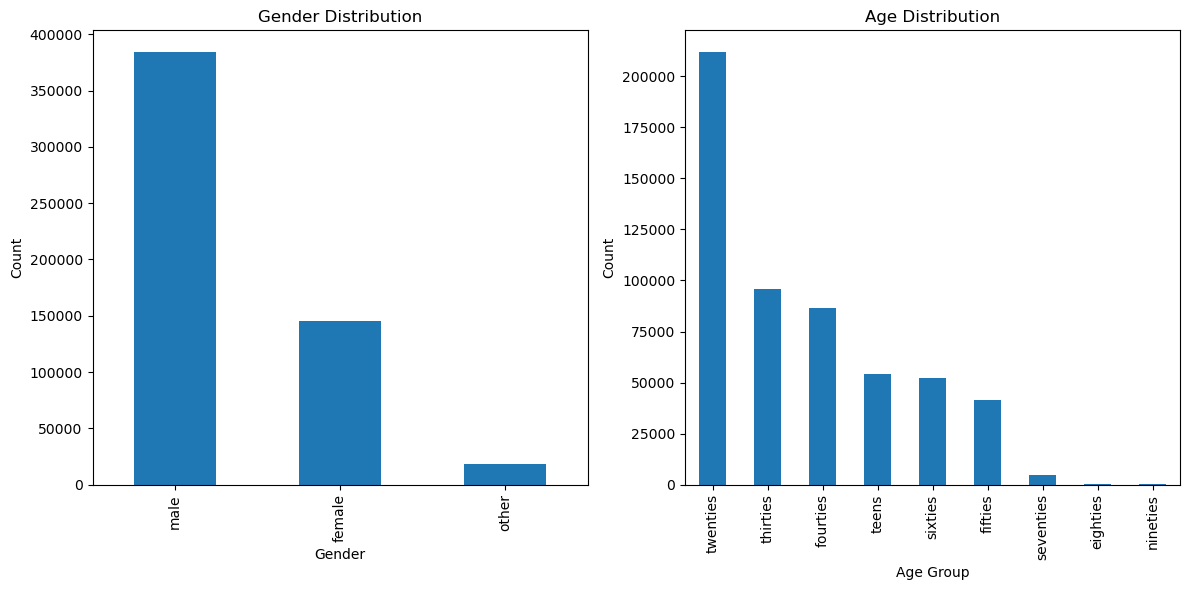

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [14]:
metadata_df.loc[(metadata_df["age"] == 'teens')  , "class"] = 10

metadata_df.loc[(metadata_df["age"] == 'twenties'), "class"] = 20

metadata_df.loc[(metadata_df["age"] == 'thirties')  , "class"] = 30

metadata_df.loc[(metadata_df["age"] == 'fourties'), "class"] = 40

metadata_df.loc[(metadata_df["age"] == 'fifties'), "class"] = 50

metadata_df.loc[(metadata_df["age"] == 'sixties'), "class"] = 60

In [15]:
metadata_df.dropna(subset=["class"], inplace=True)

In [16]:
metadata_df["class"] = metadata_df["class"].astype(int)

In [17]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 541792
Total male samples: 378614
Total female samples: 142548


#Assuming 'metadata_df' is your DataFrame containing the data
metadata_df = metadata_df.reset_index(drop=True)

#Assign class labels based on age
metadata_df.loc[(metadata_df["age"] == 'teens'), "class"] = 10
metadata_df.loc[(metadata_df["age"] == 'twenties'), "class"] = 20
metadata_df.loc[(metadata_df["age"] == 'thirties'), "class"] = 30
metadata_df.loc[(metadata_df["age"] == 'fourties'), "class"] = 40
metadata_df.loc[(metadata_df["age"] == 'fifties'), "class"] = 50
metadata_df.loc[(metadata_df["age"] == 'sixties'), "class"] = 60

#Separate data by gender
male_df = metadata_df[metadata_df['gender'] == 'male']
female_df = metadata_df[metadata_df['gender'] == 'female']

#Randomly select 40,000 samples for each gender
male_df = male_df.sample(n=378614, random_state=42)
female_df = female_df.sample(n=142548, random_state=42)

#Select 25,000 male and 15,000 female samples for the training subset
train_male_df = male_df.sample(n=25000, random_state=42)
train_female_df = female_df.sample(n=15000, random_state=42)

#Combine the training subset
metadata_df = pd.concat([train_male_df, train_female_df])

In [18]:
# Assuming 'metadata_df' is your DataFrame containing the data
metadata_df = metadata_df.reset_index(drop=True)

# Assign class labels based on age
metadata_df.loc[(metadata_df["age"] == 'teens'), "class"] = 10
metadata_df.loc[(metadata_df["age"] == 'twenties'), "class"] = 20
metadata_df.loc[(metadata_df["age"] == 'thirties'), "class"] = 30
metadata_df.loc[(metadata_df["age"] == 'fourties'), "class"] = 40
metadata_df.loc[(metadata_df["age"] == 'fifties'), "class"] = 50
metadata_df.loc[(metadata_df["age"] == 'sixties'), "class"] = 60

# Group the data by the "class" and "gender" columns
grouped = metadata_df.groupby(["class", "gender"])

# Determine the desired sample size per class and gender
desired_samples_per_class_gender = 2000  # Ensure there are at least 2,000 samples per class and gender

# Randomly select samples from each class and gender, capped at the desired sample size per class and gender
train_df_list = []
for (class_label, gender), group in grouped:
    male_group = group[group['gender'] == 'male']
    female_group = group[group['gender'] == 'female']
    
    # Ensure at least 2,000 samples per class and gender
    male_samples = min(desired_samples_per_class_gender, len(male_group))
    female_samples = min(desired_samples_per_class_gender, len(female_group))
    
    train_df_list.append(male_group.sample(n=male_samples, replace=True, random_state=42))
    train_df_list.append(female_group.sample(n=female_samples, replace=True, random_state=42))

# Combine the training subset
train_df = pd.concat(train_df_list, ignore_index=True)

# Ensure the sample sizes are exactly 18,000 male and 6,000 female
male_df = train_df[train_df['gender'] == 'male']
female_df = train_df[train_df['gender'] == 'female']

train_male_df = male_df.sample(n=18000, replace=True, random_state=42)
train_female_df = female_df.sample(n=6000, replace=True, random_state=42)

# Combine the training subset
metadata_df = pd.concat([train_male_df, train_female_df])

In [19]:
#After Decreasing the Speeach Data
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 24000
Total male samples: 18000
Total female samples: 6000


In [20]:
metadata_df.head(55)

client_id  \
15270  4bf6a8447c3ff99dfd903adf11f2bcbd514fed0b77f26f...   
2860   82f1323014e4e686176f62bc09cff55a74e61922365bce...   
11390  9f6cebab469bceb7d70ecf3baf5983da728cbd83ce3735...   
11191  b419faab633f2099c6405ff157b4d9fb5675219570f268...   
23964  ab72e9ab22713aec03a3189202a0713e56016ea07569b3...   
23284  c895f6ffc789443e064895d7a9eef515f9c01c86ff78b4...   
11734  cbd5cba5f7b1a8b9ca5d7fc56c82b2c6d24c94377bdfa6...   
14265  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
2466   2a8cac2679ad4a93423055ac6e5bd2acbc3594a2bb4c84...   
10426  79ee79ca2bb8df22b727f7d87c1d33d26e0a3957c60ee2...   
11578  b419faab633f2099c6405ff157b4d9fb5675219570f268...   
23636  ab72e9ab22713aec03a3189202a0713e56016ea07569b3...   
23363  4e222cb6ddd622b066ddb4d365bc850733c41317ce0914...   
23111  ae13a4a776cf3019e7003e952cb2def0333cc044ddab4e...   
18322  a2576ccf04ad8c0dbe2b29f3843c1ed984d8bd91480766...   
3685   c0fce8f25f23b41ed1321b49a5940b20f8b61130c14559...   
2769   92e50bfc07dba2a29043299b85aa4db3c031d5b032547e...   
22583  a26ec48a5f949e4ab6bac3205e8cf1592492142d728cab...   
14949  45dd8e770aef0c93838006a95fb062d765fcfe326537a5...   
6433   90774ec0f6ec48f6341e1d12bd9bea2ef2e29342a37f48...   
11311  6934ea90f68dd79d019e2960360dbbf4b7a82acd27c8d6...   
11051  1c9d7be6481868330040a72fc4a3c8abad94e367188d21...   
14420  adc0f5c89dfb83c7e1daeb8d5b61d39677aa8d4405a4a0...   
3184   51f67439a26da3caed47b6fc5595616e09daf322cf649d...   
10555  a22721fa679ec702c9306f00becf645a864dbbe305fe6f...   
7385   118248cb1c59797930979074f55994bc21527f385cf263...   
14396  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
23096  ae13a4a776cf3019e7003e952cb2def0333cc044ddab4e...   
18666  a2576ccf04ad8c0dbe2b29f3843c1ed984d8bd91480766...   
19274  765eb7b336c85e990a7bd81298fe7a7fde540e15fd08d1...   
6558   36f5af261041e42136d41ee476c8744fbac8f3f72225c9...   
15849  6ac8b1a295e2a4a5b11a602a368771530cd7b900ee5d8b...   
6047   cfcceeb236c95b381f274d1a4375ad2ad3cc54129cb70f...   
6747   1476c13940c901d1a5a10630c6d84205d0780be5beec08...   
19167  00c32b9cc65b255055eab5edc82fff01304d6bc592750e...   
19998  a2576ccf04ad8c0dbe2b29f3843c1ed984d8bd91480766...   
2189   2ebfff70730af8309f99d36860cd1b9fd8eba29c547426...   
6734   9db555e24714069bdfaf68dbd96c7115cd8203cf20336f...   
7005   852aa80c353a456cb30af1e418f9a961a7bcbb4ada5133...   
10658  a81630b4b4cacaa28a2f97ffbb77a9e481f6a7c33bc46e...   
3899   4de2096e29652fc2959e47ec03b5703f550080f1023963...   
15734  372293e65cdab88771e028a4351651ab2eff64438ddafc...   
3267   aae70ab2bae72d11bd3833bf7183c8da7a78ff71e7dd18...   
3528   d2d1418ed333cd8c28aae2ee79b6992cf8e485e9789f63...   
23394  c895f6ffc789443e064895d7a9eef515f9c01c86ff78b4...   
7556   914a61e8b5c5b088c9384cf189c5e31833916af4d67de5...   
7890   449e47b69e3ece6b29d2c53e1607d1afdf24a31742e3e6...   
18838  a2576ccf04ad8c0dbe2b29f3843c1ed984d8bd91480766...   
23080  1f15d77bf4a7384113ae1c68c554a50e33fcde95bfe95e...   
11393  b419faab633f2099c6405ff157b4d9fb5675219570f268...   
22627  159048f3358b0c2995f83110186bc2401d707585e7a36d...   
18792  a2576ccf04ad8c0dbe2b29f3843c1ed984d8bd91480766...   
22555  85e1baeb033b152510d0632ff3680c020eed557ec0faec...   
22253  00309ae51fe07824676d5a3b39837b0a8927c064b7a054...   
18433  376633fc1e8477250aa888f01247c5863f2d092a3c2390...   

                               path  \
15270  common_voice_en_22204311.mp3   
2860   common_voice_en_18658240.mp3   
11390  common_voice_en_25196821.mp3   
11191  common_voice_en_20374374.mp3   
23964  common_voice_en_19263366.mp3   
23284  common_voice_en_19514221.mp3   
11734  common_voice_en_19637867.mp3   
14265  common_voice_en_21332907.mp3   
2466   common_voice_en_18717671.mp3   
10426  common_voice_en_19958012.mp3   
11578  common_voice_en_21500189.mp3   
23636  common_voice_en_18713366.mp3   
23363  common_voice_en_19802771.mp3   
23111  common_voice_en_19439643.mp3   
18322  common_voice_en_23992581.mp3   
3685   common_voice_en_25128078.mp3   
2769   common_voice_en_

In [21]:
metadata_df.groupby("class")["class"].unique()

class
10    [10]
20    [20]
30    [30]
40    [40]
50    [50]
60    [60]
Name: class, dtype: object

In [22]:
metadata_df.groupby("age")["age"].unique()

age
fifties      [fifties]
fourties    [fourties]
sixties      [sixties]
teens          [teens]
thirties    [thirties]
twenties    [twenties]
Name: age, dtype: object

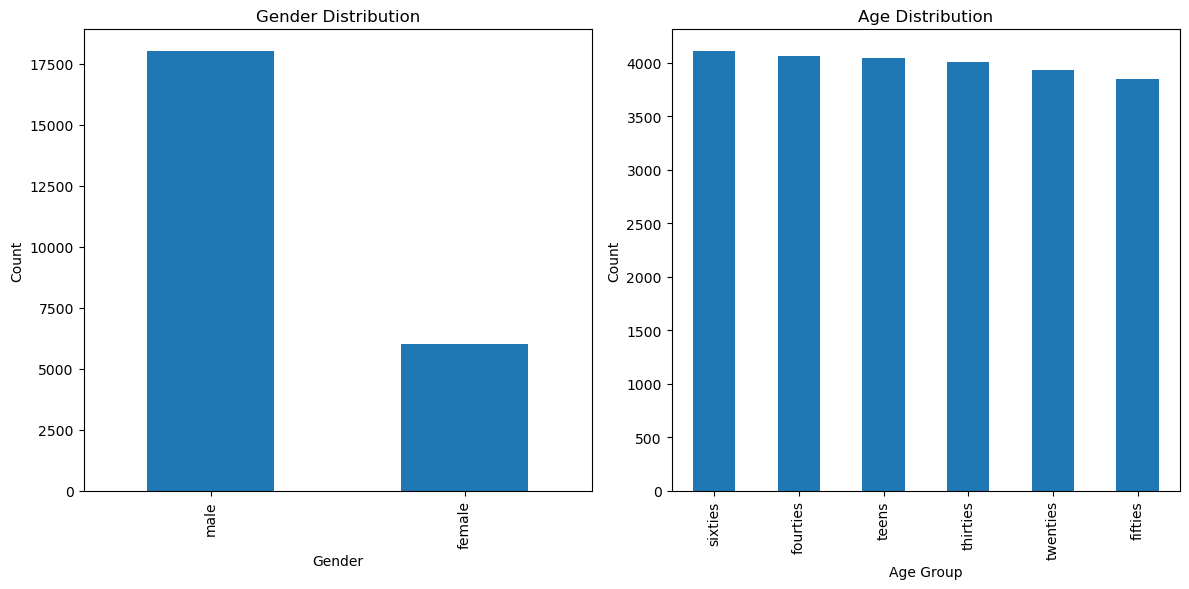

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [25]:
 metadata_df.count()

client_id     24000
path          24000
sentence      24000
up_votes      24000
down_votes    24000
age           24000
gender        24000
accent        17001
locale        24000
segment           0
class         24000
dtype: int64

In [26]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 200

Text(0.5, 1.0, 'Gender')

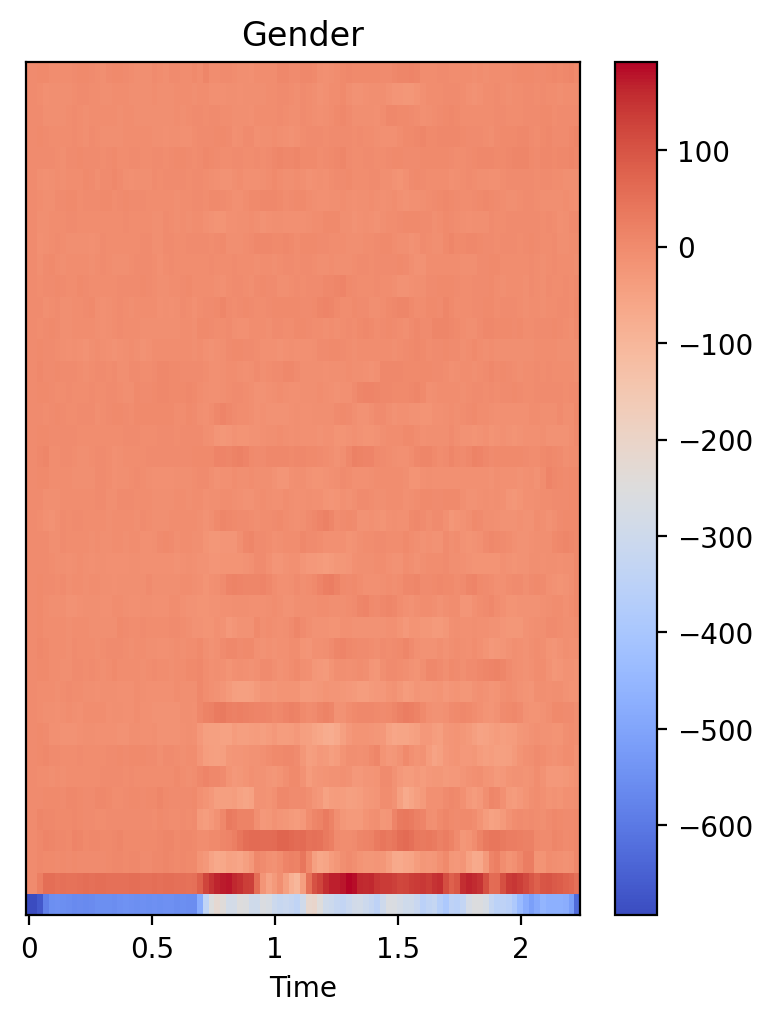

In [27]:

audio_path =  "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_1.mp3"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("Gender")

In [28]:
x = metadata_df["class"].unique()
y = metadata_df["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("class")
plt.show()

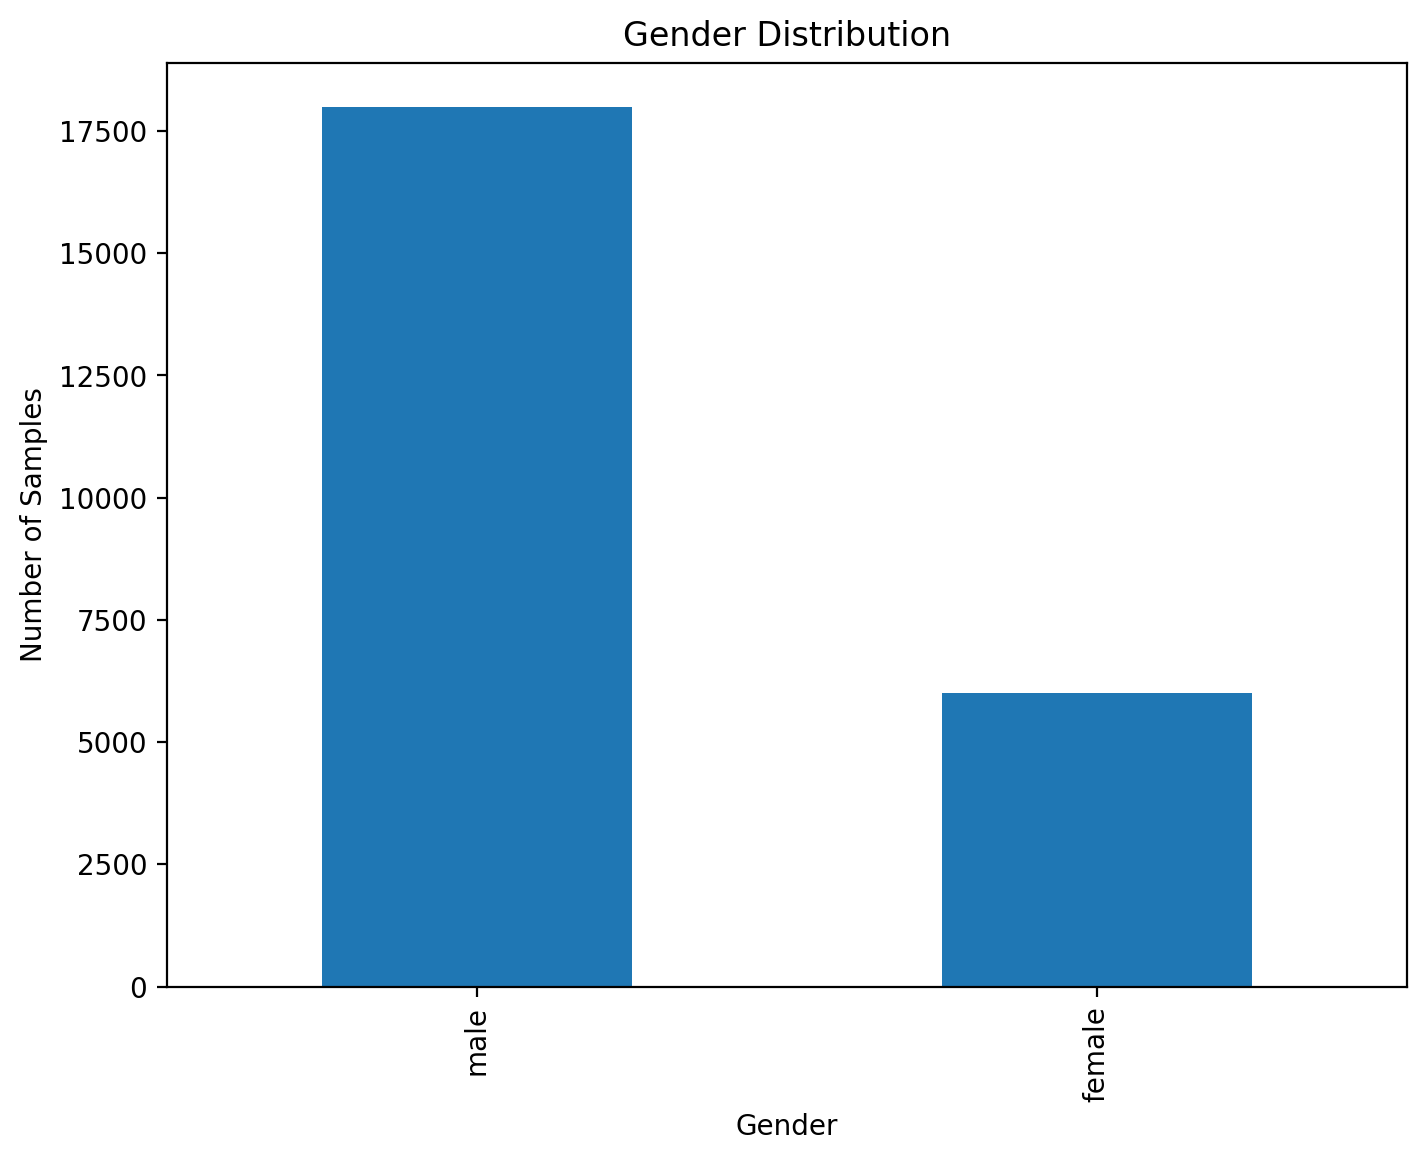

In [29]:
import matplotlib.pyplot as plt

# Plot histogram for gender
plt.figure(figsize=(8, 6))
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [30]:
import IPython.display as ipd
import librosa
import lazy_loader as lazy
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [31]:
#!pip install resampy

In [32]:
#!pip install --upgrade librosa

In [33]:
#!pip install resampy

In [34]:
#!pip3 install resampy

In [35]:
#!pip install pandas

In [36]:
import resampy

In [37]:
#!pip install --upgrade librosa

In [33]:
import os
import librosa
import numpy as np
from tqdm import tqdm

# List to store the extracted features and labels
extracted = []

# Iterate over each row in the DataFrame within the specified range
#for index_num, row in tqdm(metadata_df.iloc[:1045].iterrows()):
#for index_num, row in tqdm(metadata_df.iloc[:120002].iterrows()):
for index_num, row in tqdm(metadata_df.iloc[:23999].iterrows()):
    # Get the file path
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    
    # Get the file label
    final_class_label = row["class"]
    
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
    
    # Extract the features (MFCC)
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    
    # Feature scaling
    scaled_features = np.mean(features.T, axis=0)
    
    # Store the features and label in the list
    extracted.append([scaled_features, final_class_label])

23999it [45:53,  8.71it/s]


desired_duration=10
def feature_extractor(filename):
    data,sr = librosa.load(filename, duration = desired_duration, res_type='kaise_best')
    if len(data) < sr * desired_duration:
        data = np.pad(data, (0, sr * desired_duration - len(data)))
         
    
    mfcc_features = librosa.feature.mfcc(y=data,sr=samp_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

#Runtime - 2min 14 sec 775 iterations for 3 clips per bird
from tqdm import tqdm #Allows to see progress
extracted_features=[]
for index_num,row in tqdm(metadata_df.iterrows()):
    final_class_labels=row["class"]
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    data=feature_extractor(file_path)
    extracted_features.append([data,final_class_labels])

In [38]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_dffinal.pkl")
extracted_df.head()

NameError: name 'extracted' is not defined

# create a new dataframe
extracted = []
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df1.pkl")
extracted_df.head(55)

## Data Preprocessing
### Distribute the data to X and Y

In [39]:
final = pd.read_pickle("extracted_dffinal.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

### Split the data into train and test sets

In [40]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  19199
Number of testing samples =  4800


### Model 1 - ANN
#### Building the model

In [41]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,410,956 (5.38 MB)

 Trainable params: 1,410,956 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model

In [42]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Fitting the model

In [43]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("ANN_Model.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2811 - loss: 2.4727 - val_accuracy: 0.4354 - val_loss: 1.3731
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4601 - loss: 1.3408 - val_accuracy: 0.4860 - val_loss: 1.2559
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5166 - loss: 1.1923 - val_accuracy: 0.5294 - val_loss: 1.1860
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5746 - loss: 1.0753 - val_accuracy: 0.5858 - val_loss: 1.0587
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6322 - loss: 0.9619 - val_accuracy: 0.6125 - val_loss: 1.0102
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6791 - loss: 0.8466 - val_accuracy: 0.6510 - val_loss: 0.9401
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7241 - loss: 0.7419 - val_accuracy: 0.6883 - val_loss: 0.8526
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7787 - loss: 0.6251 -

ANN Model Saved


## Results

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [46]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [47]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])

In [48]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_18944712.mp3"
# get the output
ANN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
ANN has predicted the class as  -->  20


In [49]:
# Evaluate the performance of the speaker recognition model
speaker_loss, speaker_accuracy = ANN_Model.evaluate(X_test, y_test)
print(f"Speaker Recognition Accuracy: {speaker_accuracy * 100:.2f}%")

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8747 - loss: 0.9350
Speaker Recognition Accuracy: 87.81%


In [50]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       785
           1       0.88      0.78      0.83       781
           2       0.76      0.86      0.81       813
           3       0.89      0.92      0.90       814
           4       0.94      0.90      0.92       756
           5       0.95      0.95      0.95       851

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800



In [115]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Compute the confusion matrix
confusion_mat = np.array([[671, 32, 49, 14, 8, 11], 
                         [49, 608, 76, 23, 11, 14],
                         [29, 22, 699, 40, 17, 6],
                         [9, 4, 36, 750, 9, 6],
                         [10, 17, 33, 11, 680, 5],
                         [1, 6, 30, 6, 1, 807]])

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", 
           xticklabels=[10, 20, 30, 40, 50, 60],
           yticklabels=[10, 20, 30, 40, 50, 60])
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

Accuracy   : 0.878125
Precision  : 0.8813513234278293
Recall     : 0.877031287903824
F1-score   : 0.8779805545720557


[[671  32  49  14   8  11]
 [ 49 608  76  23  11  14]
 [ 29  22 699  40  17   6]
 [  9   4  36 750   9   6]
 [ 10  17  33  11 680   5]
 [  1   6  30   6   1 807]]


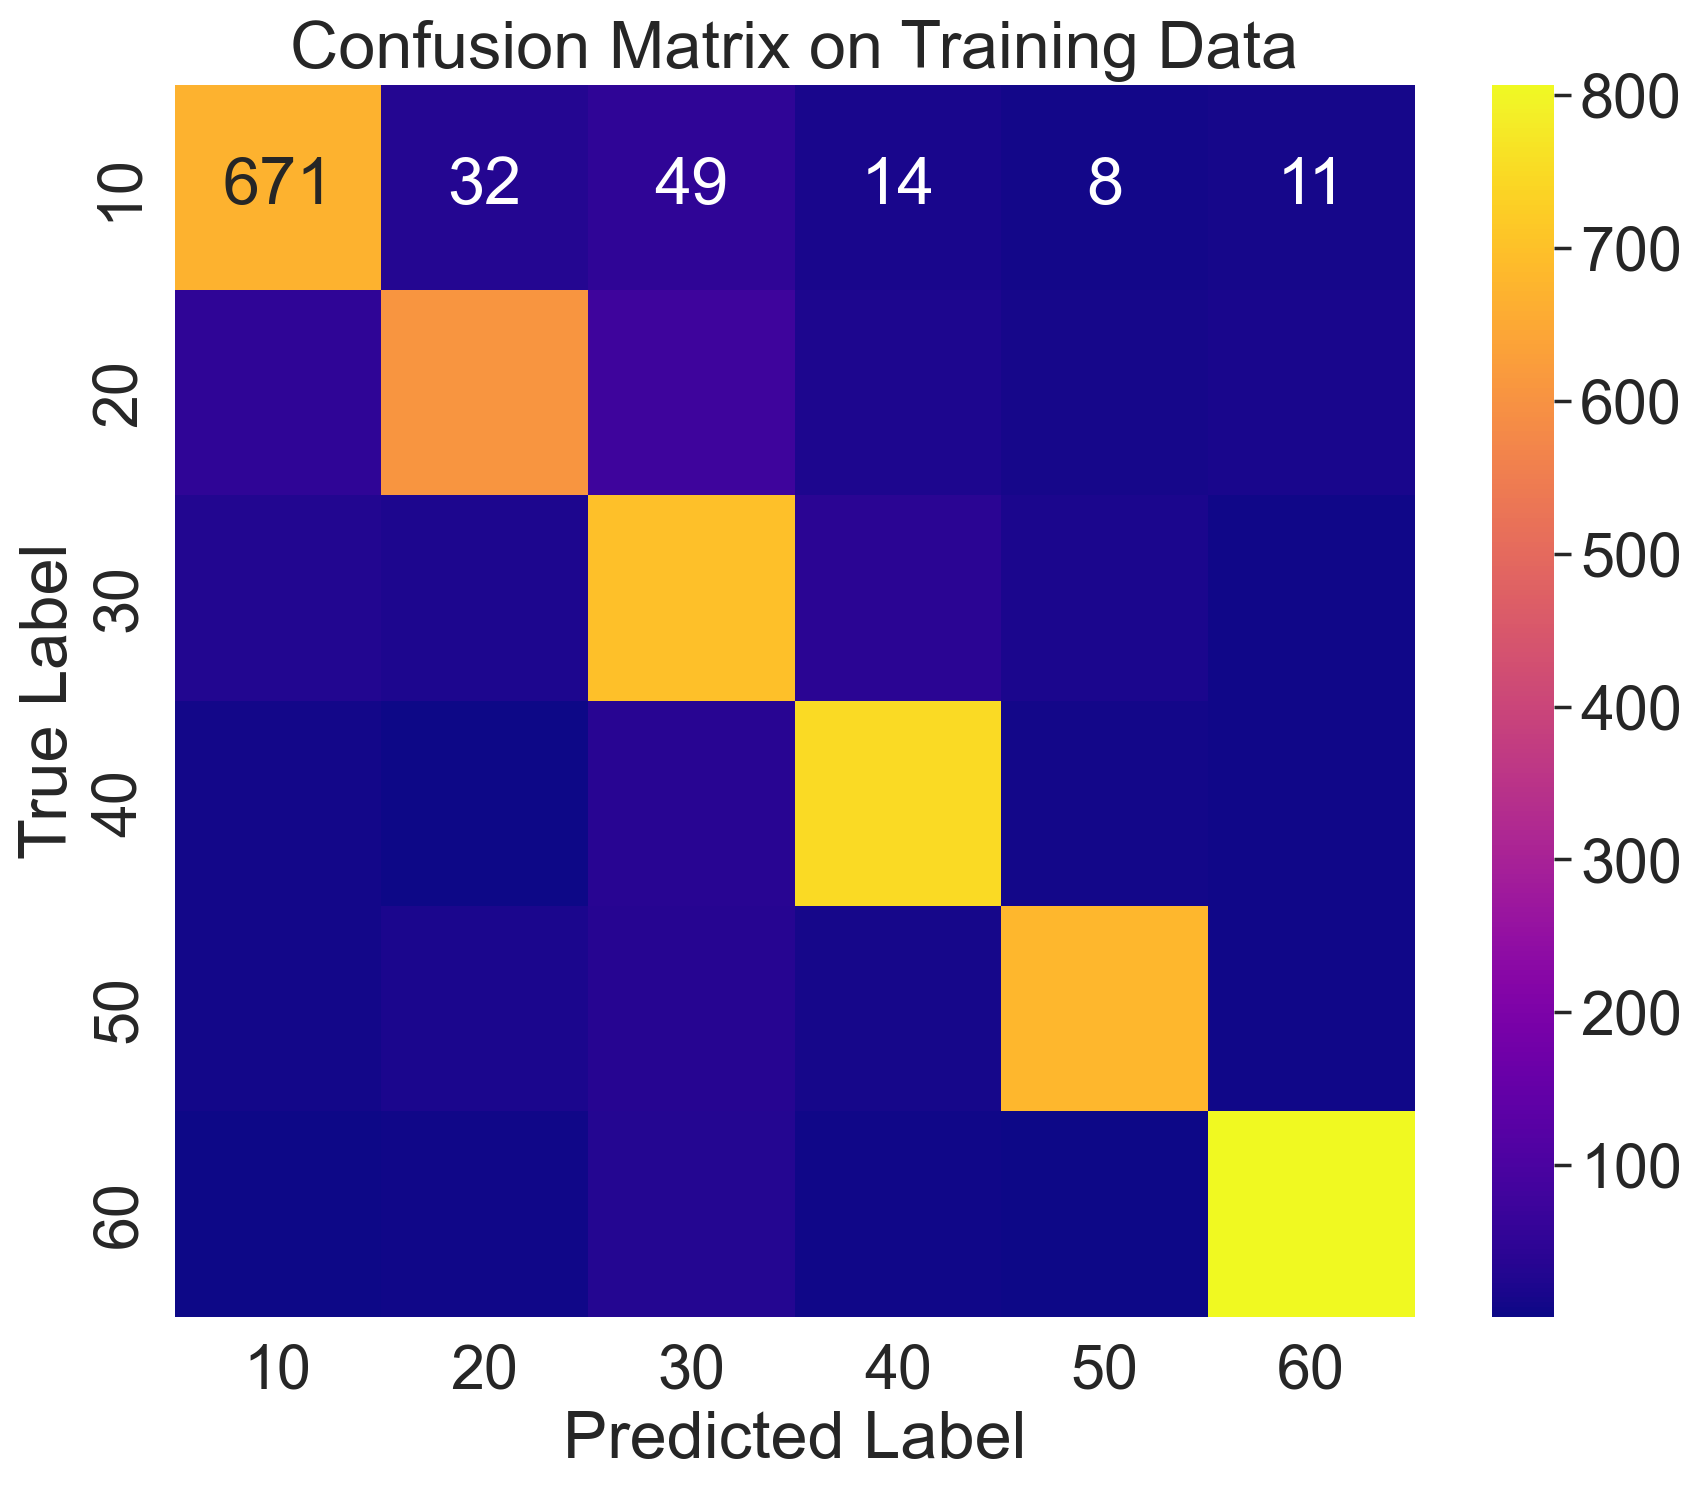

Accuracy  : 0.878125
Precision : 0.8813513234278293
Recall   : 0.877031287903824
F1-score  : 0.8779805545720557


In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1),y_test_pred_classes)
print(confusion_mat)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat,annot=True,fmt="d",cmap="plasma", xticklabels=[10, 20, 30, 40, 50, 60], yticklabels=[10, 20, 30, 40, 50, 60])
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Ensure you have this line to display the plot
plt.show()

# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy  :", accuracy)
print("Precision :", precision)
print("Recall   :", recall)
print("F1-score  :", f1)

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = ANN_Model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

SyntaxError: '(' was never closed (2480956590.py, line 23)

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time

# Assuming you have the necessary variables and models already defined
t0 = time.time()
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the test data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=np.unique(y_test.argmax(axis=1)), columns=np.unique(y_test_pred_classes))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   : 0.878125
Precision  : 0.8813513234278293
Recall     : 0.877031287903824
F1-score   : 0.8779805545720557


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


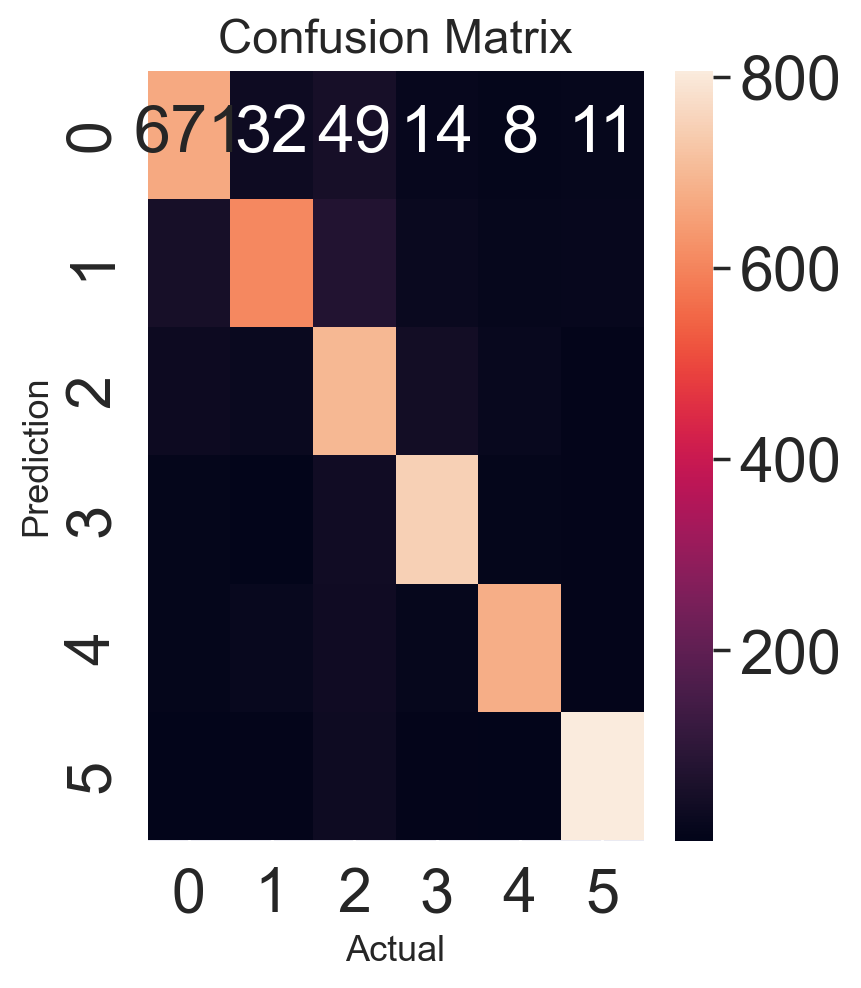

Accuracy   : 0.878125


In [119]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Get the model predictions on the training data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
#Plot the confusion matrix.
sns.heatmap(confusion_mat,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
 
 
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


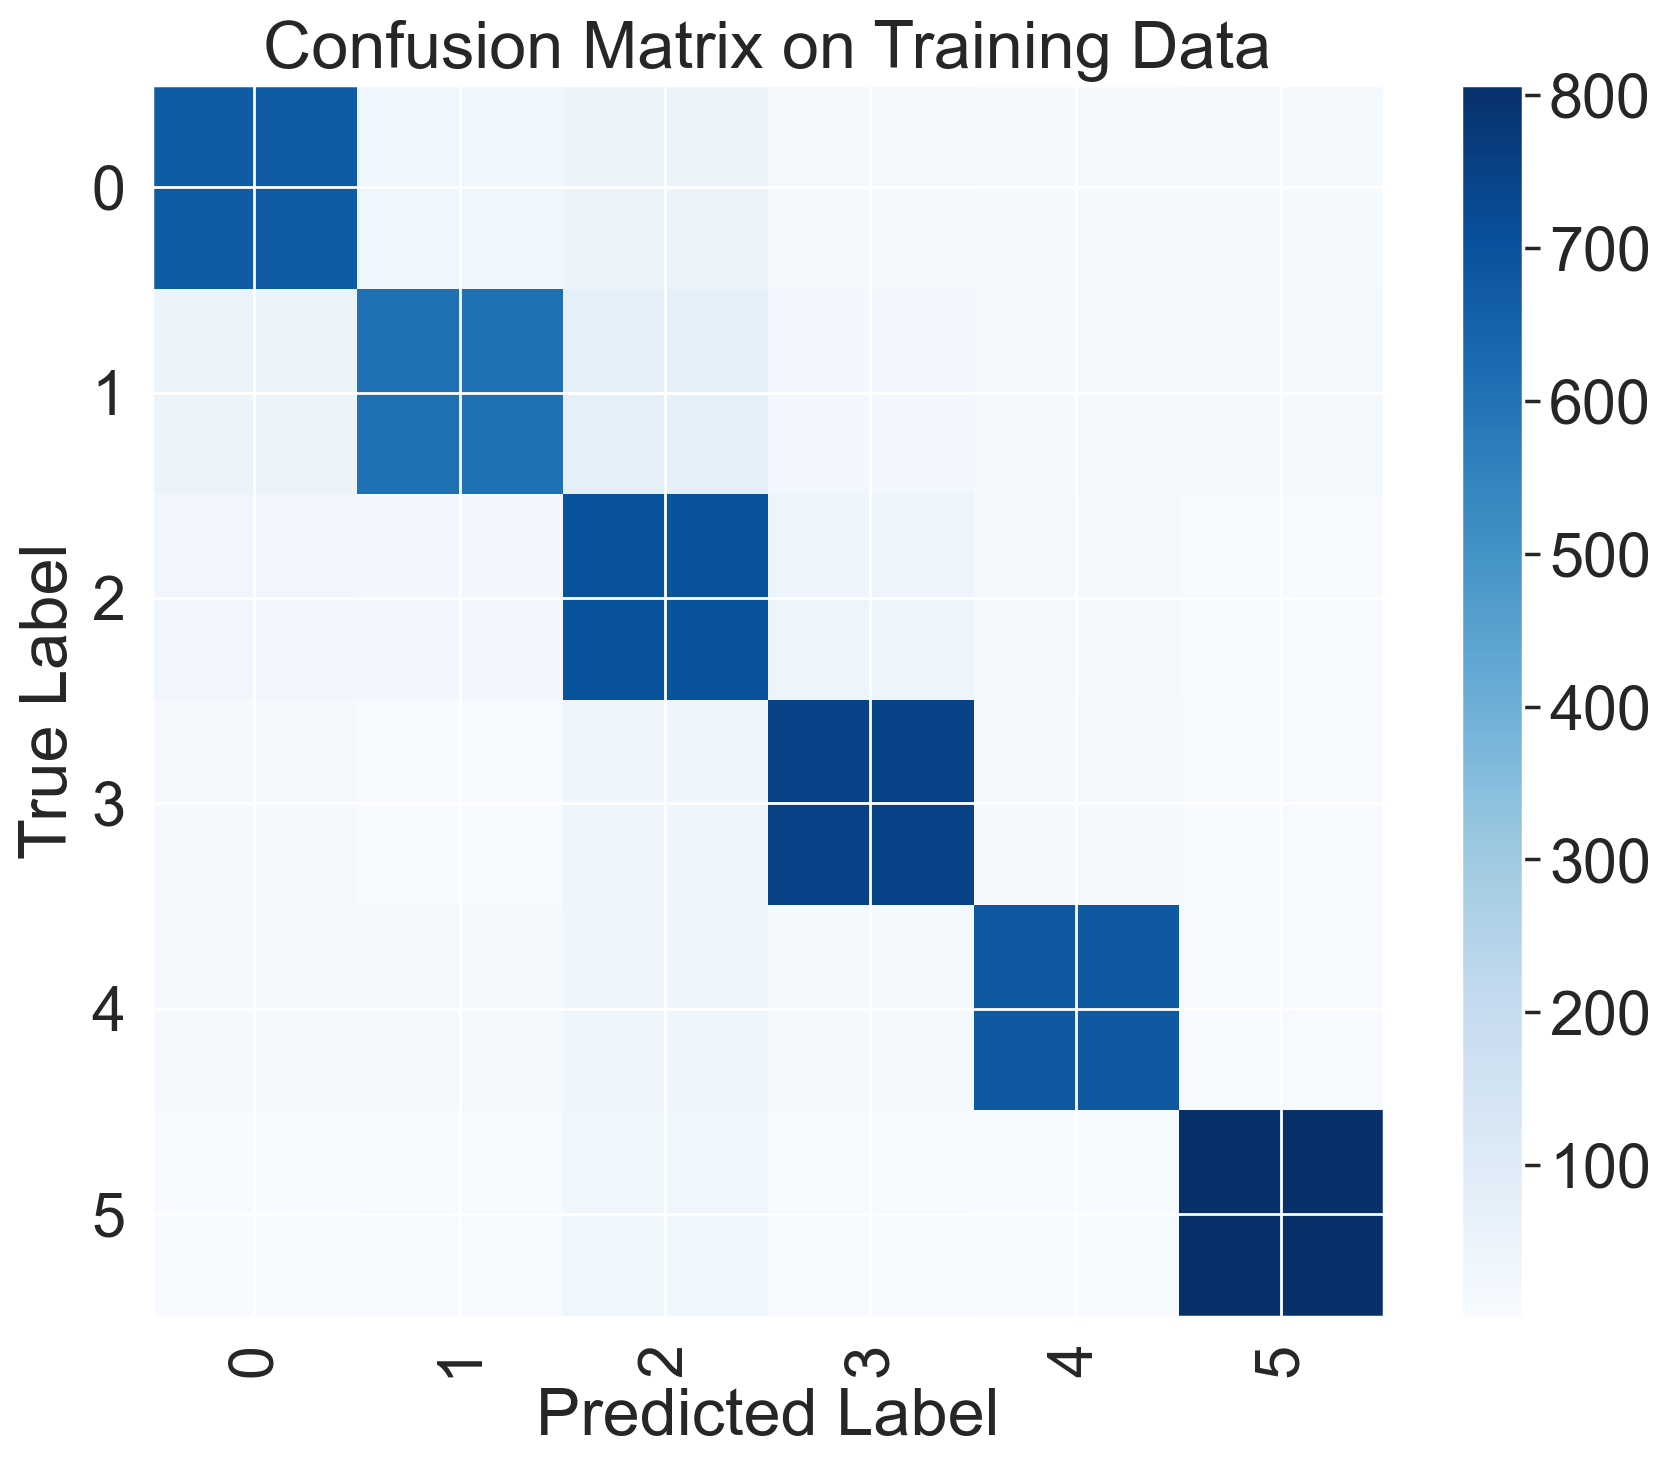

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the model predictions on the training data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Training Data')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train.argmax(axis=1))))
plt.xticks(tick_marks, labels=np.unique(y_train.argmax(axis=1)), rotation=90)
plt.yticks(tick_marks, labels=np.unique(y_train.argmax(axis=1)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model 2 - CNN### 
Preprocessing

In [121]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1000, activation='relu'))
cnn_model.add(Dense(750, activation='relu'))
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(250, activation='relu'))
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(50, activation='relu'))
num_classes = 6 # Replace 3 with the actual number of classes in your data
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 126, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1000)           │     3,841,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147,916 (19.64 MB)

 Trainable params: 5,147,916 (19.64 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_results=cnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.3397 - loss: 1.5710 - val_accuracy: 0.4948 - val_loss: 1.2368
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5427 - loss: 1.1200 - val_accuracy: 0.6237 - val_loss: 0.9842
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6974 - loss: 0.8024 - val_accuracy: 0.7244 - val_loss: 0.7931
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8237 - loss: 0.5012 - val_accuracy: 0.7767 - val_loss: 0.6815
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9019 - loss: 0.3037 - val_accuracy: 0.8117 - val_loss: 0.5950
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9386 - loss: 0.1933 - val_accuracy: 0.8231 - val_loss: 0.6790
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9539 - loss: 0.1415 - val_accuracy: 0.8367 - val_loss: 0.6606
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9737 - loss: 0

In [123]:
cnn_model.save("cnn_model.h5")
print("cnn_model  Saved")

cnn_model  Saved


In [124]:
train_hist_m2 = pd.DataFrame(cnn_results.history)
train_m2 = round(time.time() - t0, 3)

In [125]:
# function to predict the feature
def CNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(cnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN has predicted the class as  --> ", predicted_class[0])

In [126]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
CNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
CNN has predicted the class as  -->  20


In [127]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       785
           1       0.79      0.76      0.77       781
           2       0.82      0.82      0.82       813
           3       0.88      0.90      0.89       814
           4       0.87      0.90      0.89       756
           5       0.94      0.96      0.95       851

    accuracy                           0.86      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.86      0.86      0.86      4800



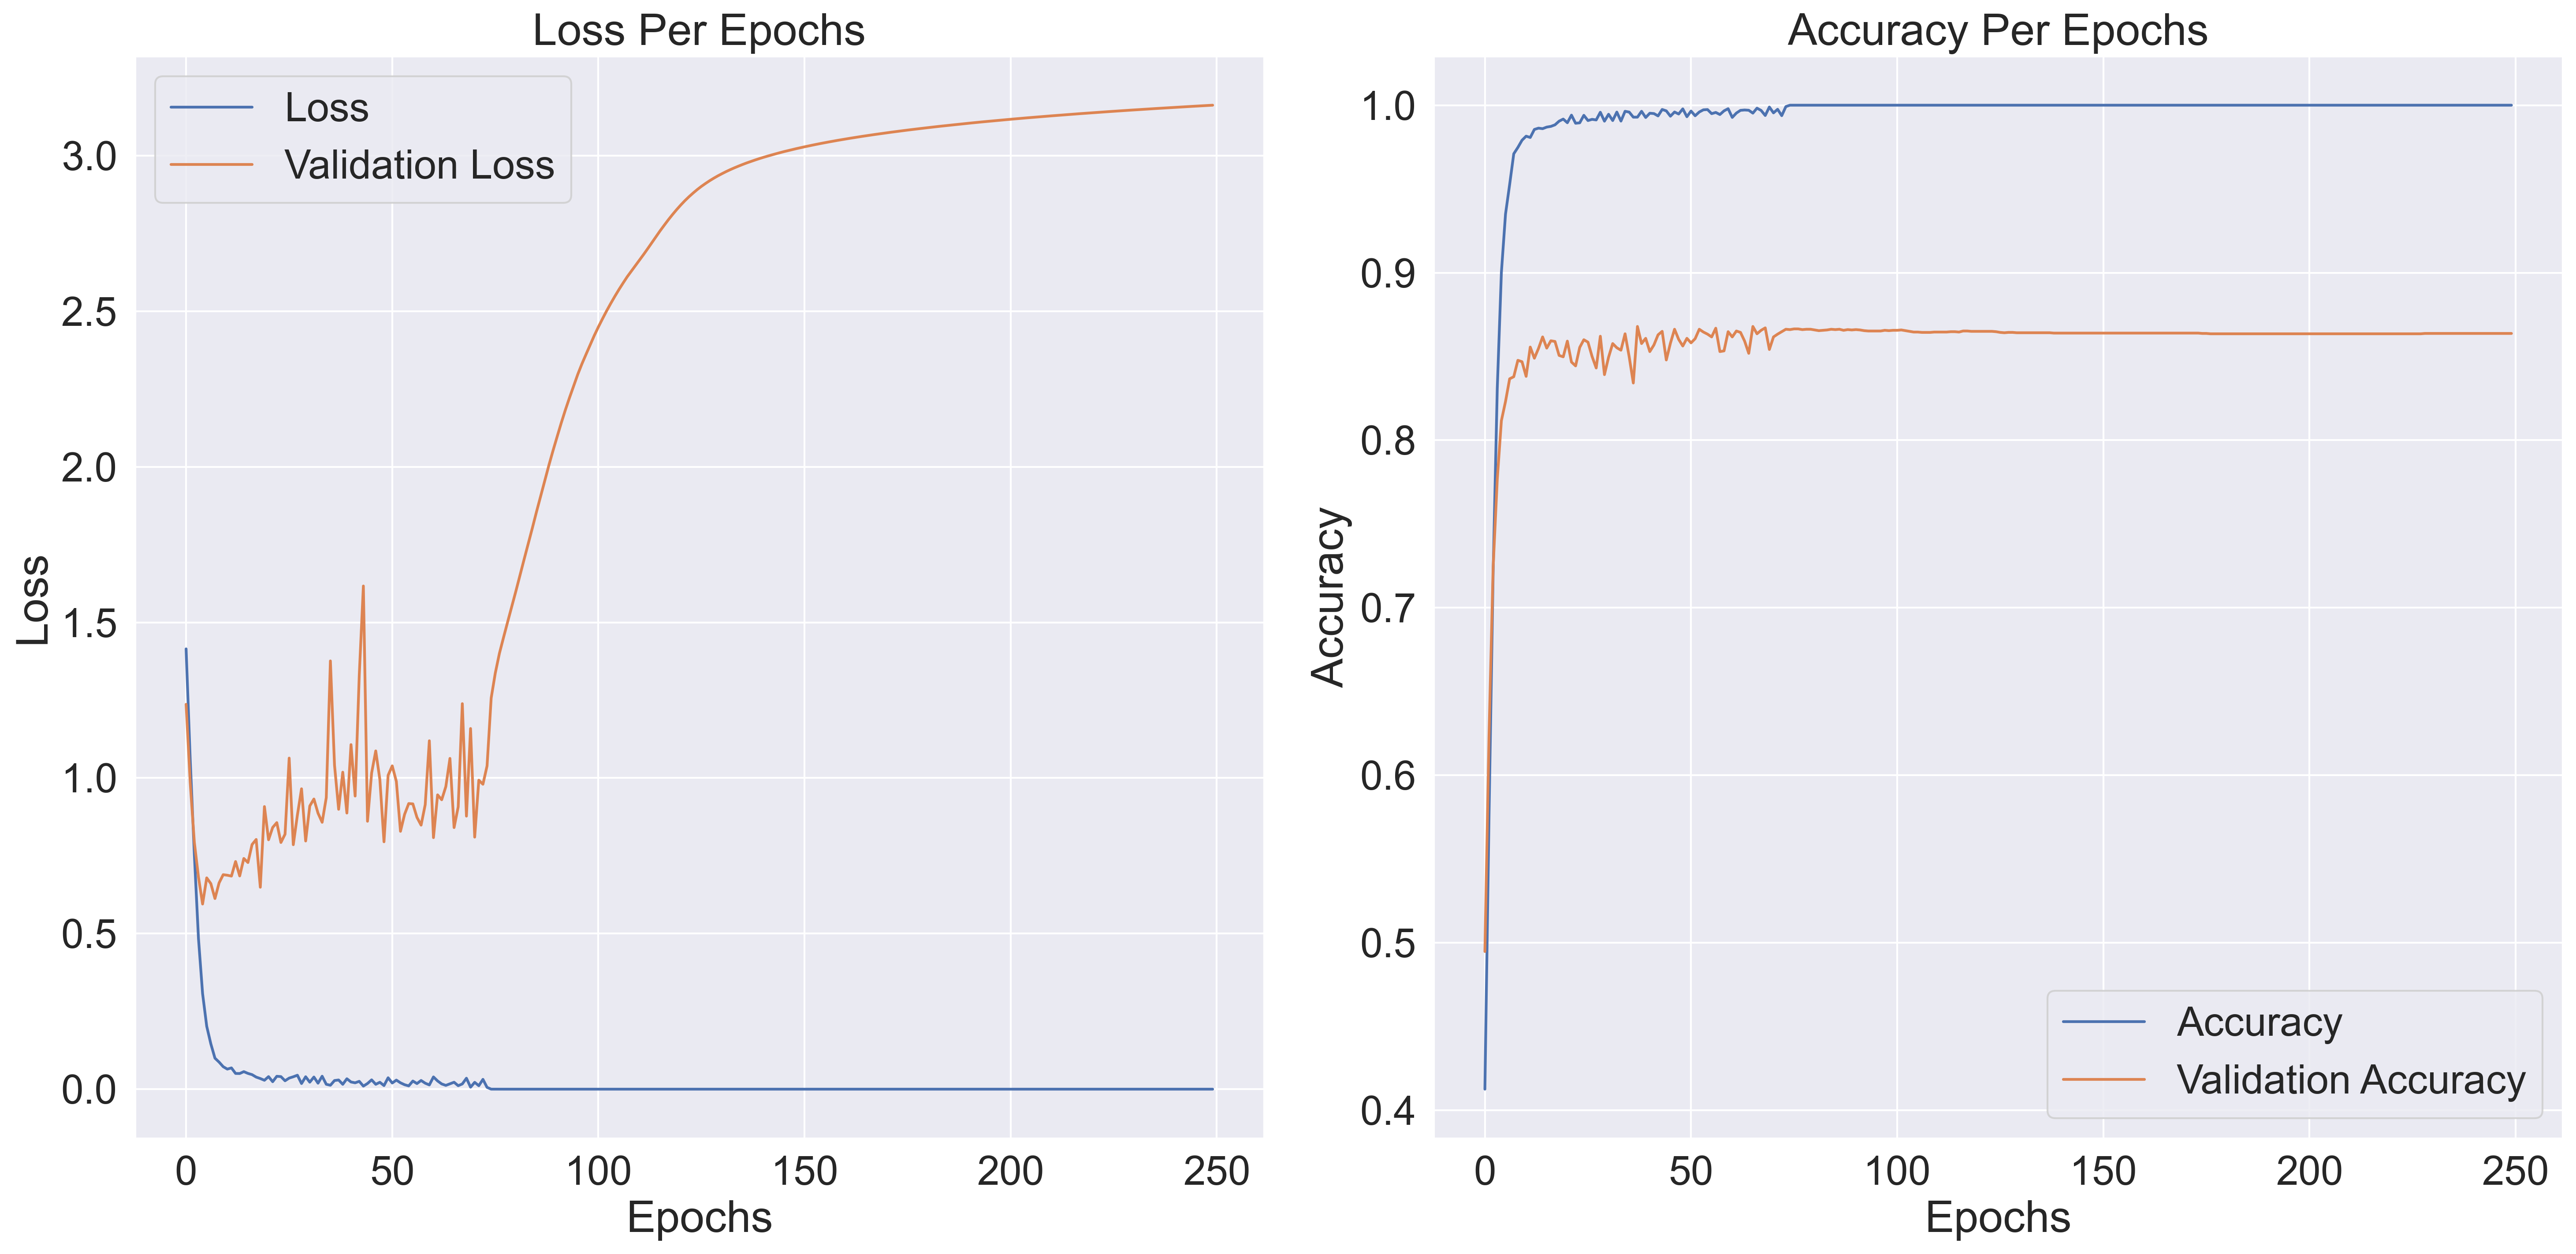

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [130]:
train_hist_m1 = pd.DataFrame(cnn_results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = cnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = cnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[655  56  36  14  19   5]
 [ 58 592  58  31  31  11]
 [ 24  51 670  25  23  20]
 [ 15  22  22 735  13   7]
 [ 10  21  14  24 680   7]
 [  1   6  14   4  12 814]]


Accuracy   : 0.86375


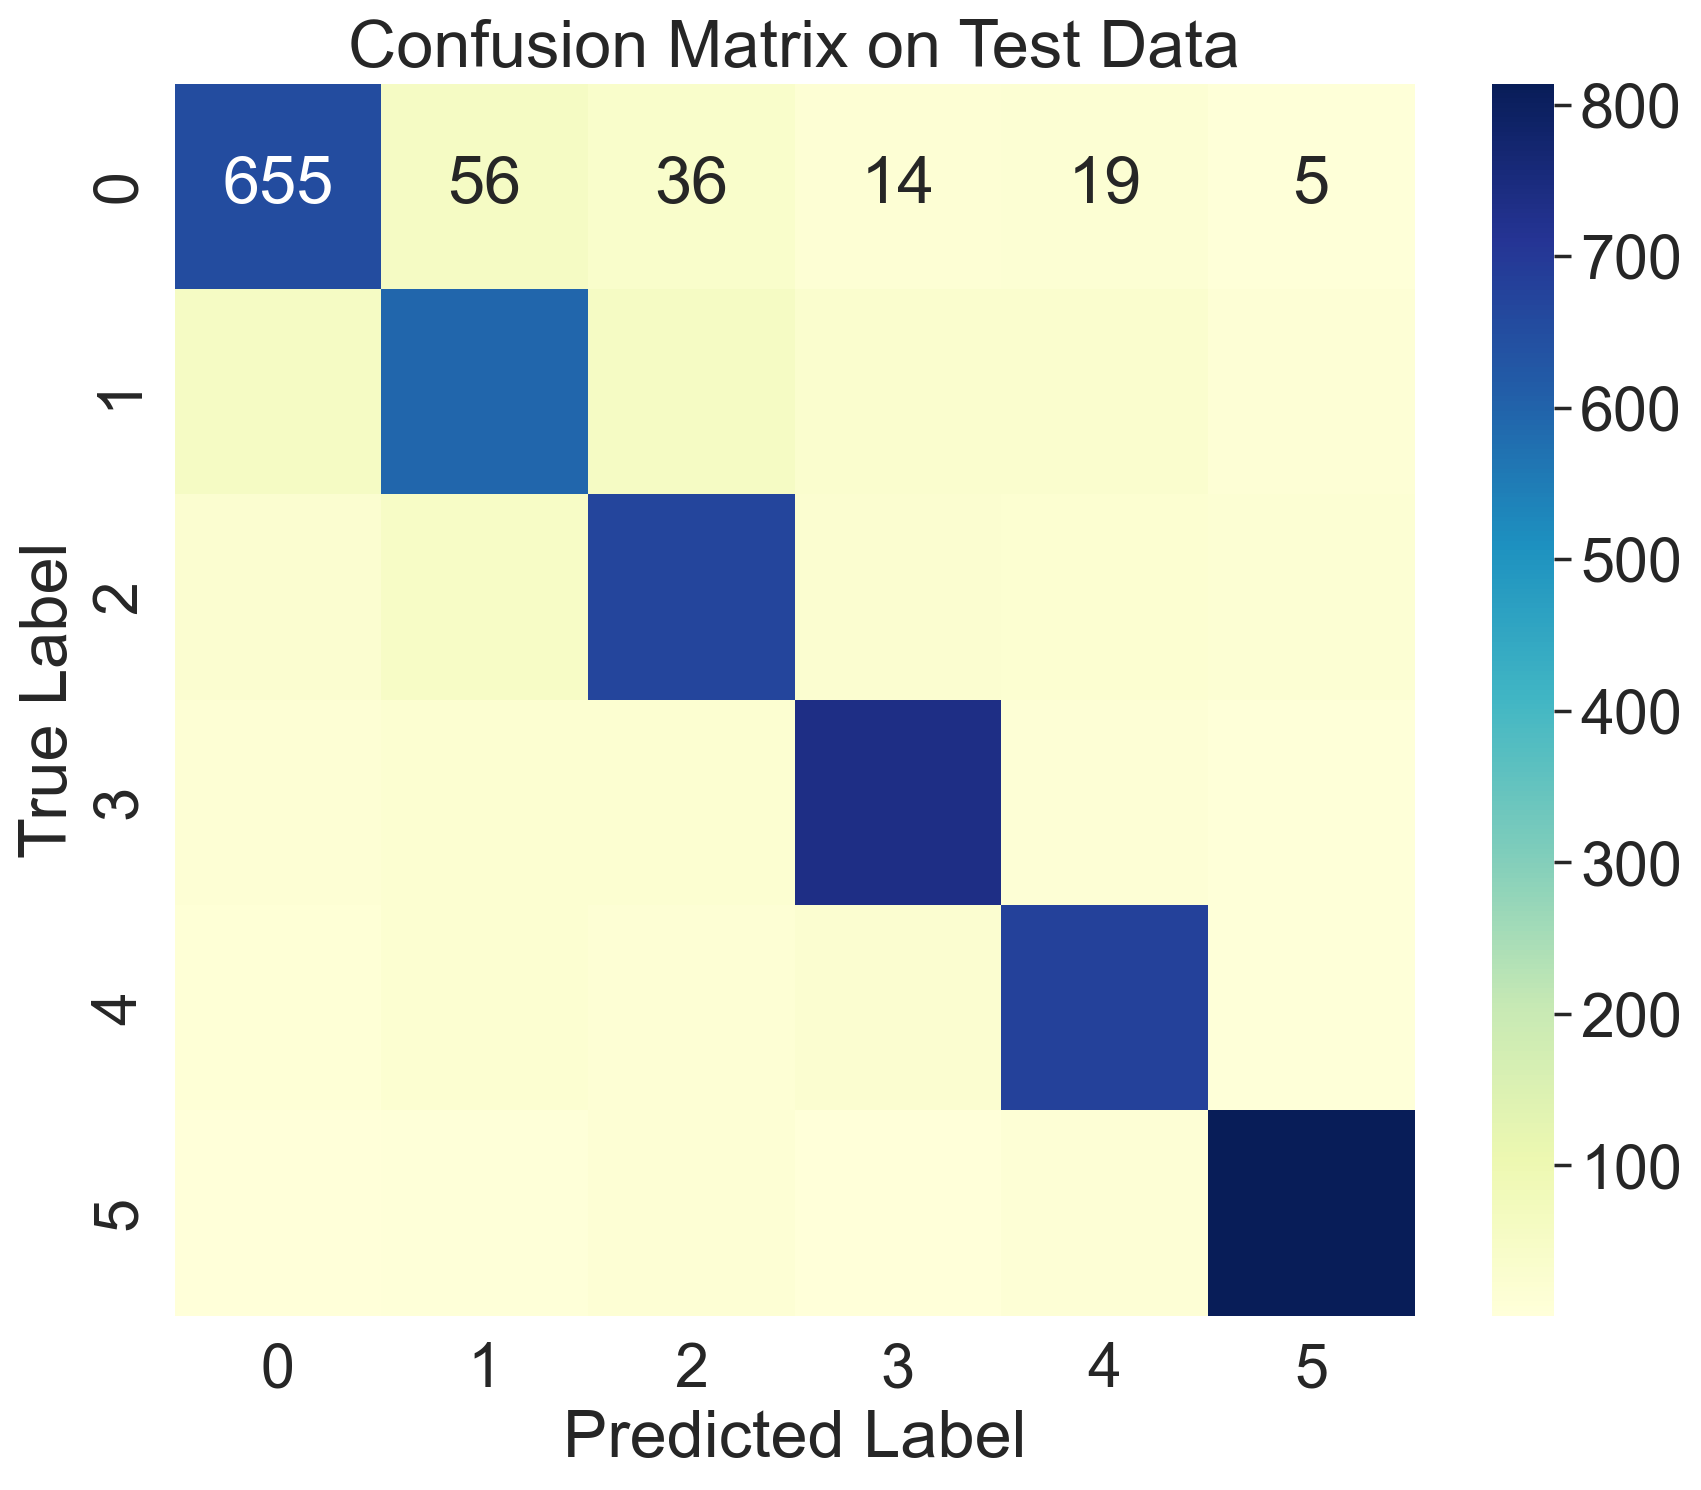

In [131]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)

# Get the unique class labels
class_labels = np.unique(y_test.argmax(axis=1))

# Create the confusion matrix DataFrame
df_cm = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model 3-LSTM

In [132]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1000, activation='relu'))
lstm_model.add(Dense(750, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(250, activation='relu'))
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(50, activation='relu'))
num_classes = 6  # Replace 3 with the actual number of classes in your data
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,852 (5.20 MB)

 Trainable params: 1,363,852 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [133]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_results=lstm_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2038 - loss: 1.7729 - val_accuracy: 0.2598 - val_loss: 1.7210
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.2509 - loss: 1.7242 - val_accuracy: 0.2835 - val_loss: 1.6893
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.2839 - loss: 1.6956 - val_accuracy: 0.2912 - val_loss: 1.6725
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.2942 - loss: 1.6743 - val_accuracy: 0.3002 - val_loss: 1.6617
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3046 - loss: 1.6543 - val_accuracy: 0.2996 - val_loss: 1.6400
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3166 - loss: 1.6381 - val_accuracy: 0.3098 - val_loss: 1.6268
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3190 - loss: 1.6295 - val_accuracy: 0.3133 - val_loss: 1.6169
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3201 - loss: 1

In [134]:
lstm_model.save("lstm_model.h5")
print("lstm_model  Saved")

lstm_model  Saved


In [135]:
# function to predict the feature
def LSTM_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(lstm_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("LSTM has predicted the class as  --> ", predicted_class[0])

In [136]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
LSTM_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
LSTM has predicted the class as  -->  50


In [143]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       785
           1       0.72      0.69      0.70       781
           2       0.70      0.73      0.71       813
           3       0.82      0.82      0.82       814
           4       0.82      0.79      0.81       756
           5       0.85      0.87      0.86       851

    accuracy                           0.78      4800
   macro avg       0.78      0.77      0.77      4800
weighted avg       0.78      0.78      0.78      4800



150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


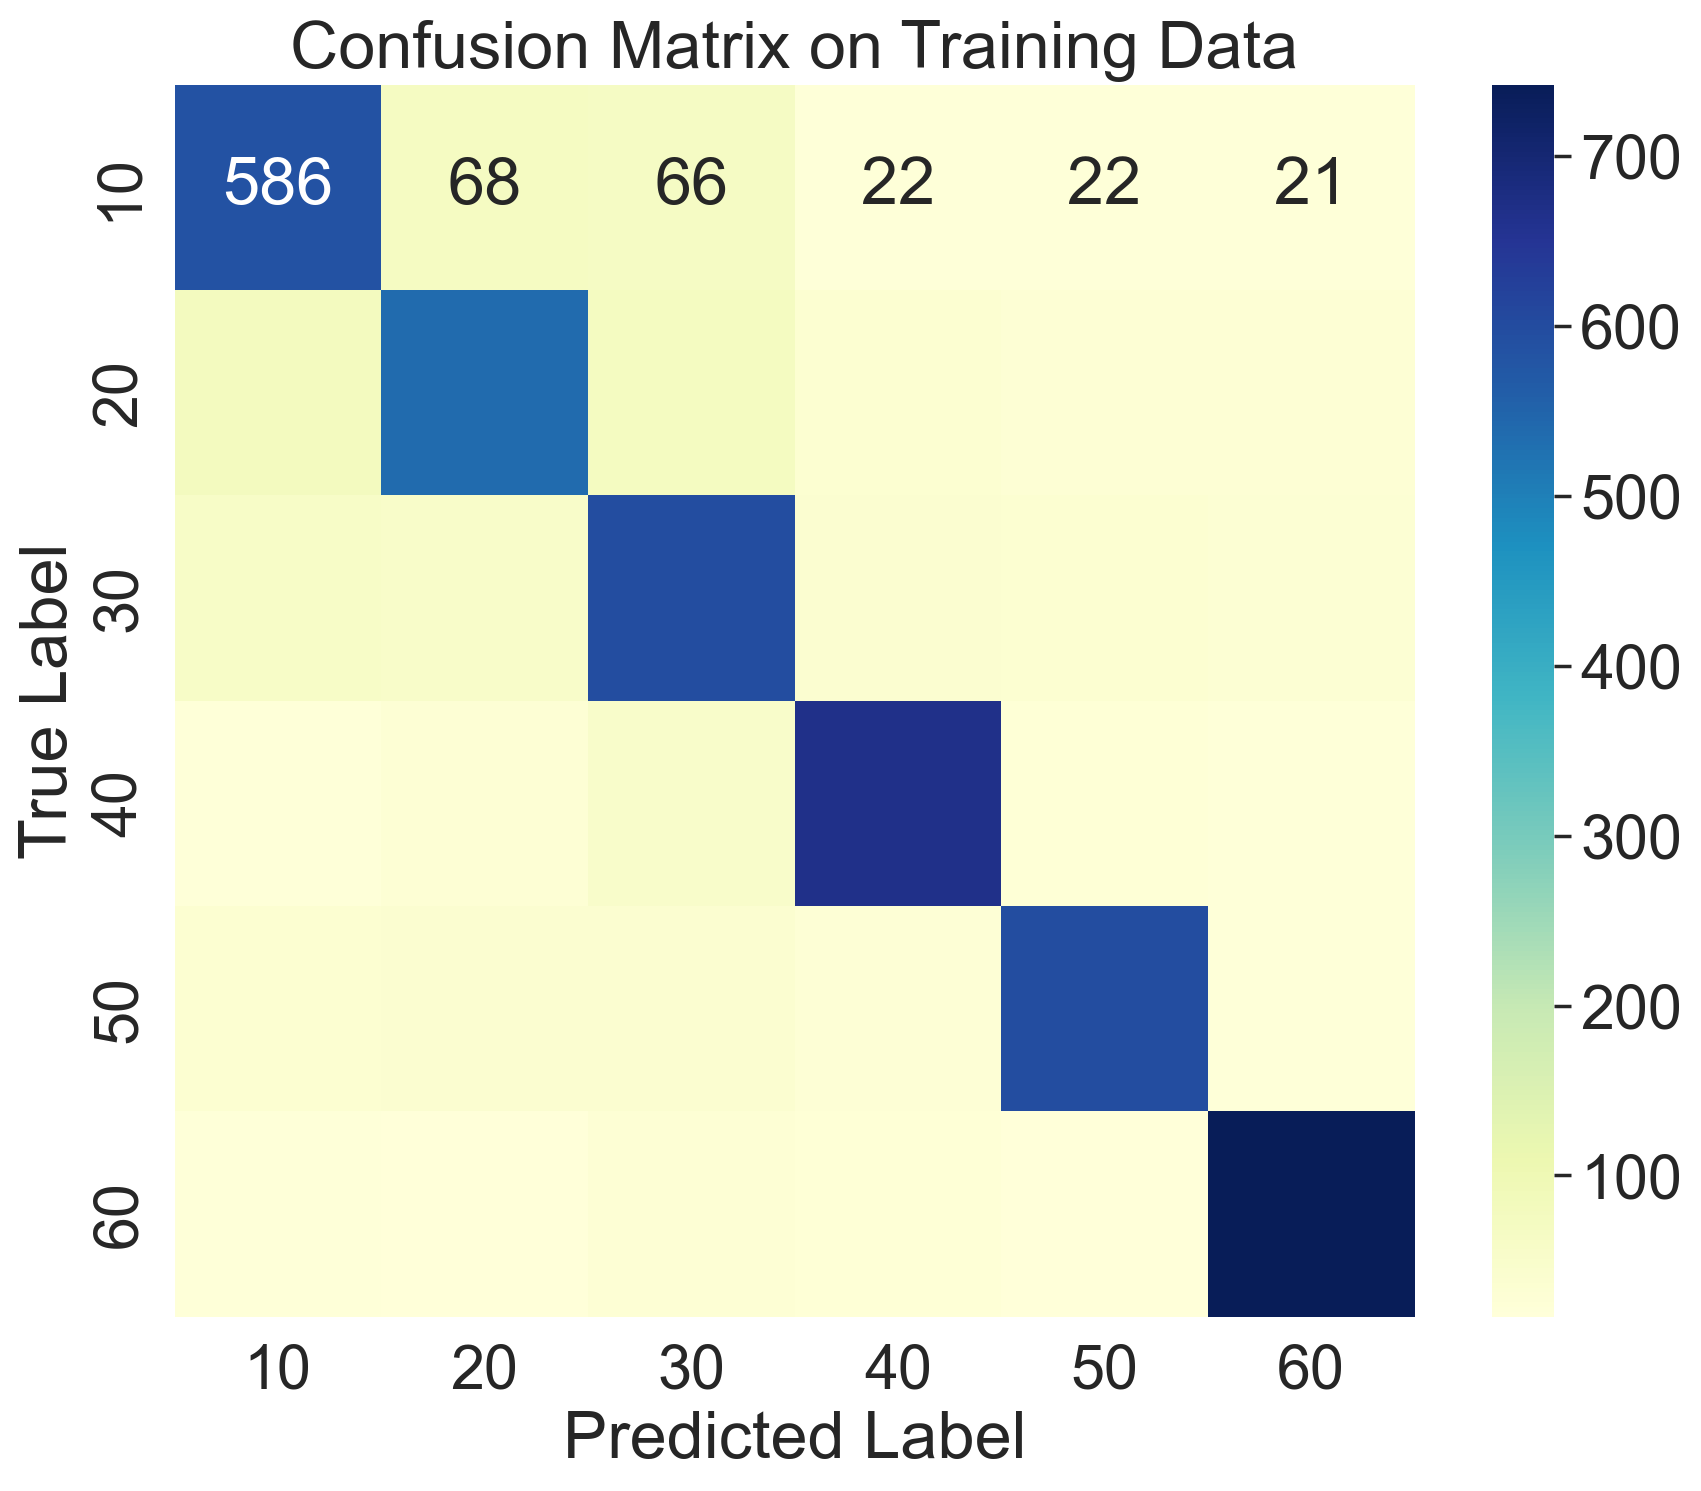

Accuracy   : 0.7758333333333334


In [141]:
train_hist_m3 = pd.DataFrame(lstm_results.history)
train_m3 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

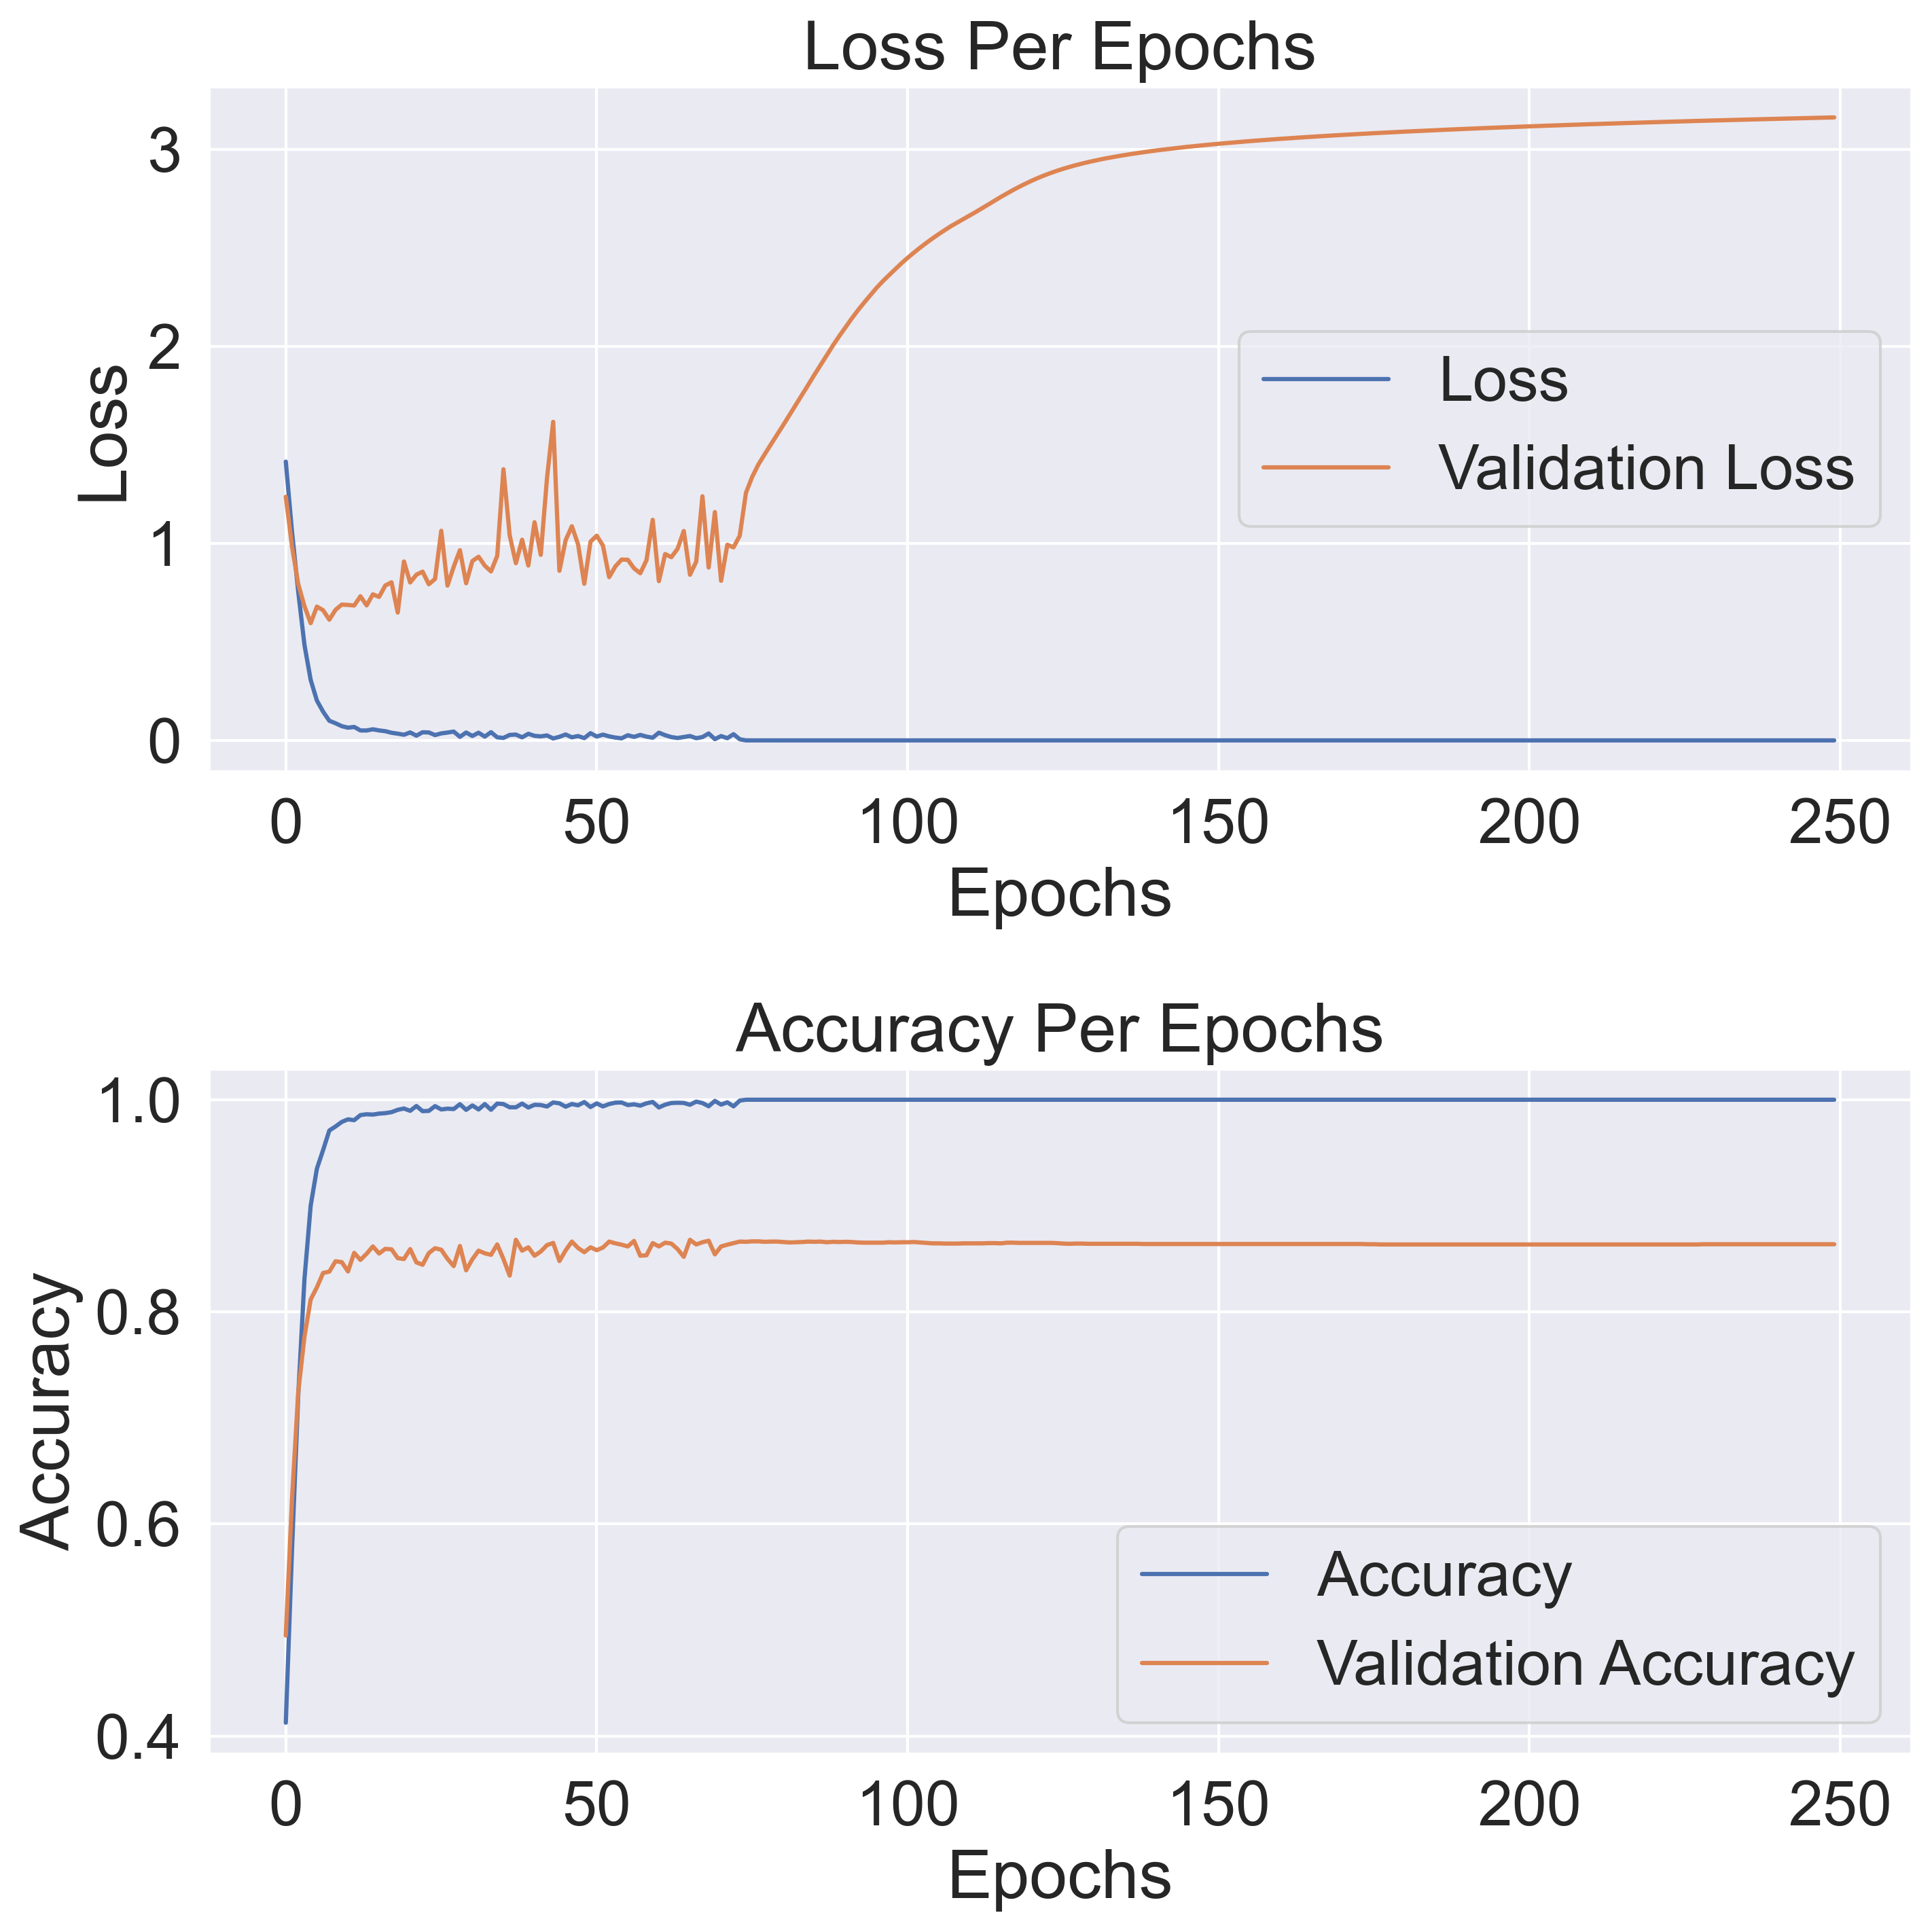

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(2, 1, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(2, 1, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
[[586  68  66  22  22  21]
 [ 77 536  73  35  31  29]
 [ 57  54 595  39  35  33]
 [ 21  29  52 668  23  21]
 [ 35  38  37  27 597  22]
 [ 20  17  30  25  17 742]]


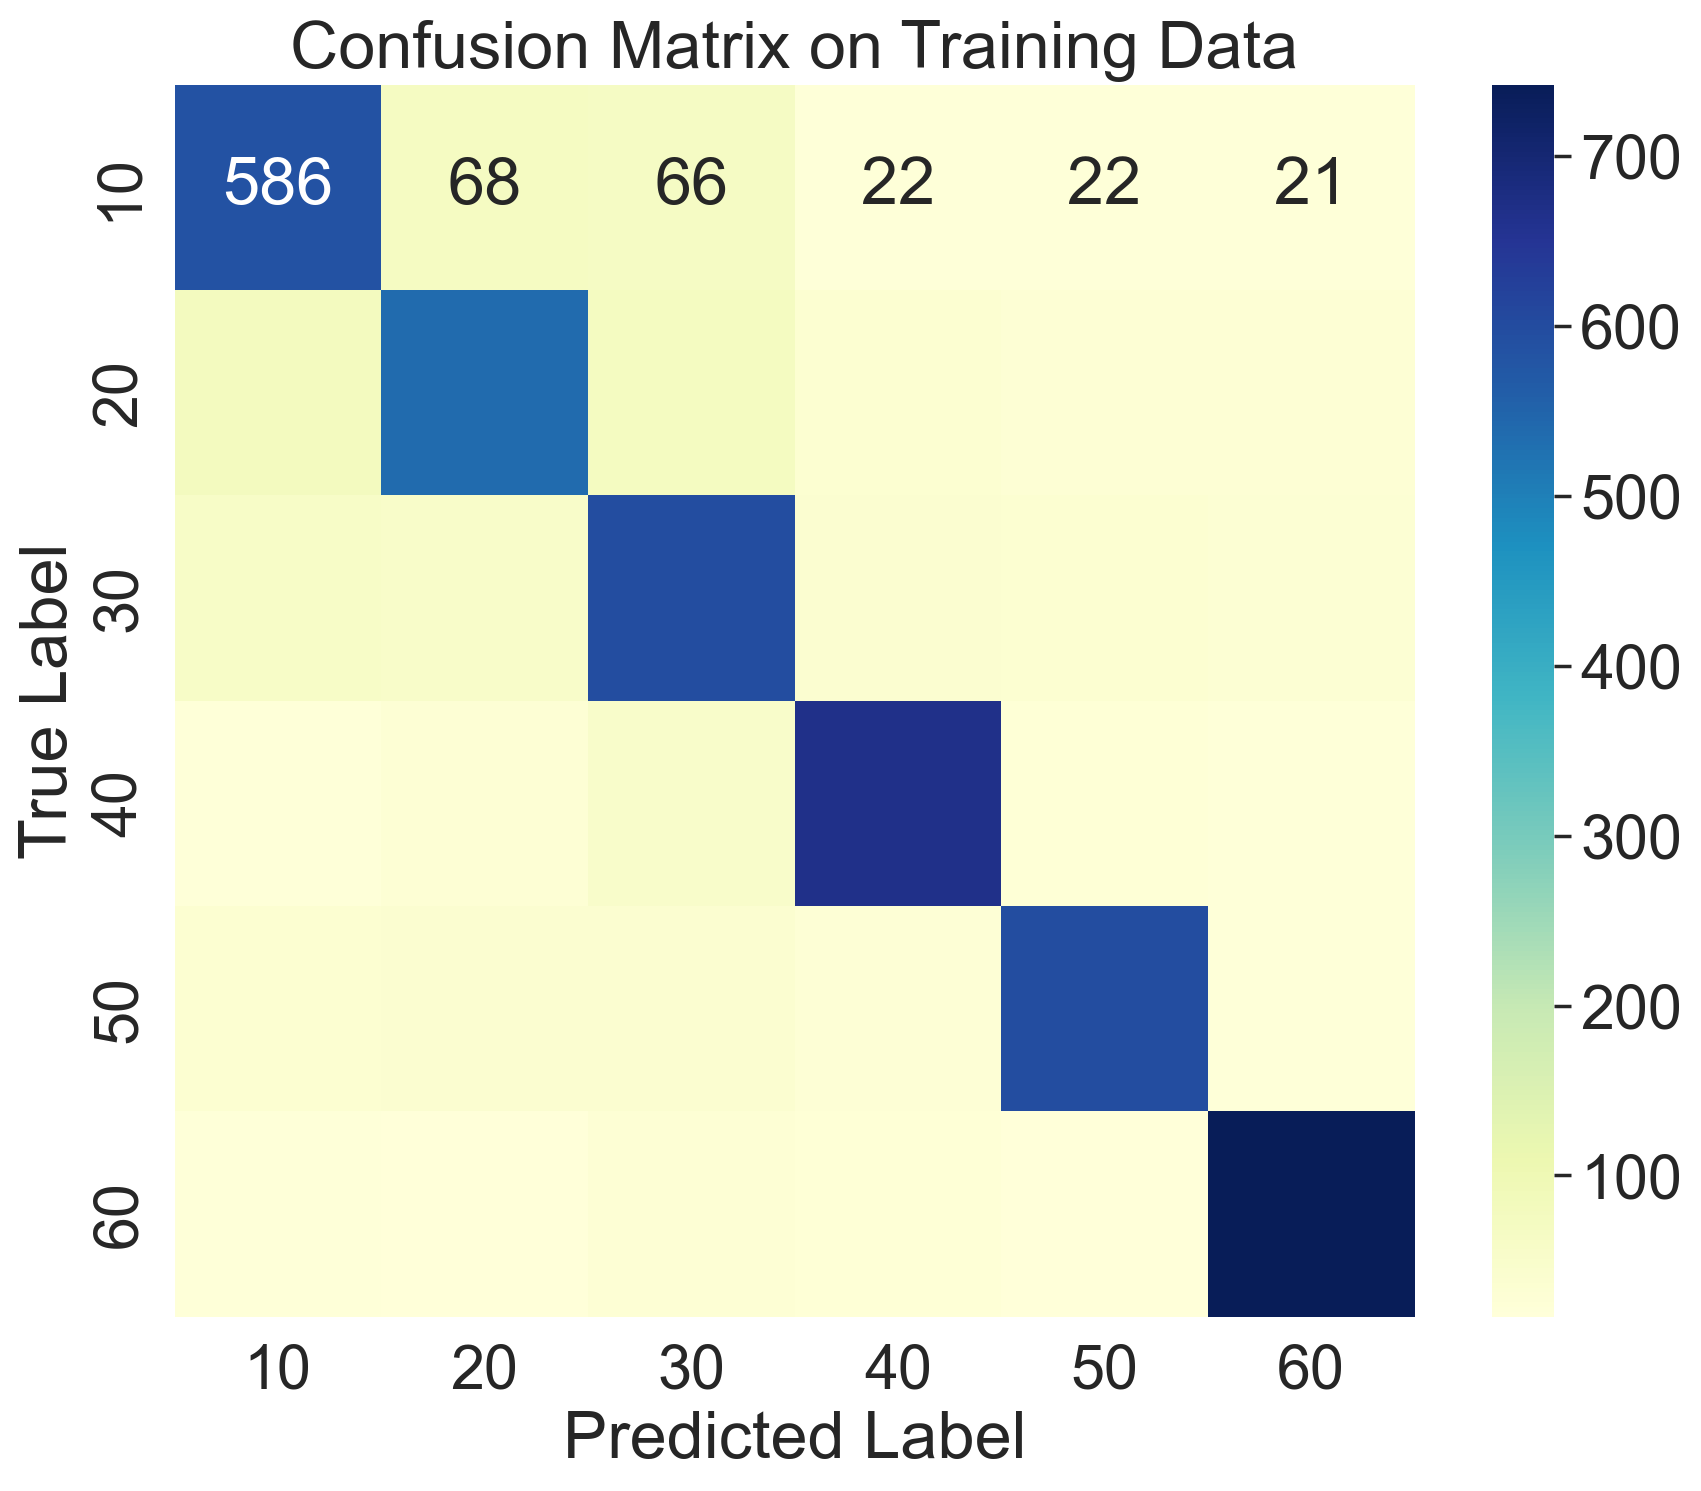

Accuracy   : 0.7758333333333334


In [145]:
# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

## RNN

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1000, activation='relu'))
rnn_model.add(Dense(750, activation='relu'))
rnn_model.add(Dense(500, activation='relu'))
rnn_model.add(Dense(250, activation='relu'))
rnn_model.add(Dense(100, activation='relu'))
rnn_model.add(Dense(50, activation='relu'))
num_classes = 6  # Replace 3 with the actual number of classes in your data
rnn_model.add(Dense(num_classes, activation='softmax'))

rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,852 (5.20 MB)

 Trainable params: 1,363,852 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [148]:
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_results=rnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - accuracy: 0.5075 - loss: 1.2426 - val_accuracy: 0.4919 - val_loss: 1.2984
Epoch 2/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5117 - loss: 1.2280 - val_accuracy: 0.4833 - val_loss: 1.3307
Epoch 3/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5162 - loss: 1.2209 - val_accuracy: 0.4942 - val_loss: 1.3049
Epoch 4/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.5199 - loss: 1.2133 - val_accuracy: 0.5021 - val_loss: 1.2641
Epoch 5/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5323 - loss: 1.1909 - val_accuracy: 0.5115 - val_loss: 1.2683
Epoch 6/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5411 - loss: 1.1769 - val_accuracy: 0.5108 - val_loss: 1.2553
Epoch 7/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5432 - loss: 1.1616 - val_accuracy: 0.4917 - val_loss: 1.2801
Epoch 8/250
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5487 - loss: 1

In [149]:
lstm_model.save("rnn_model.h5")
print("rnn_model  Saved")

rnn_model  Saved


In [150]:
# function to predict the feature
def RNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(rnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("RNN has predicted the class as  --> ", predicted_class[0])

In [151]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
RNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
RNN has predicted the class as  -->  60


In [154]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)

150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       785
           1       0.68      0.66      0.67       781
           2       0.74      0.74      0.74       813
           3       0.79      0.82      0.81       814
           4       0.80      0.78      0.79       756
           5       0.89      0.85      0.87       851

    accuracy                           0.77      4800
   macro avg       0.77      0.77      0.77      4800
weighted avg       0.77      0.77      0.77      4800



150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
[[601  69  50  27  21  17]
 [100 519  58  33  45  26]
 [ 59  75 598  31  29  21]
 [ 34  42  25 666  37  10]
 [ 25  44  36  48 587  16]
 [ 16  18  37  35  18 727]]


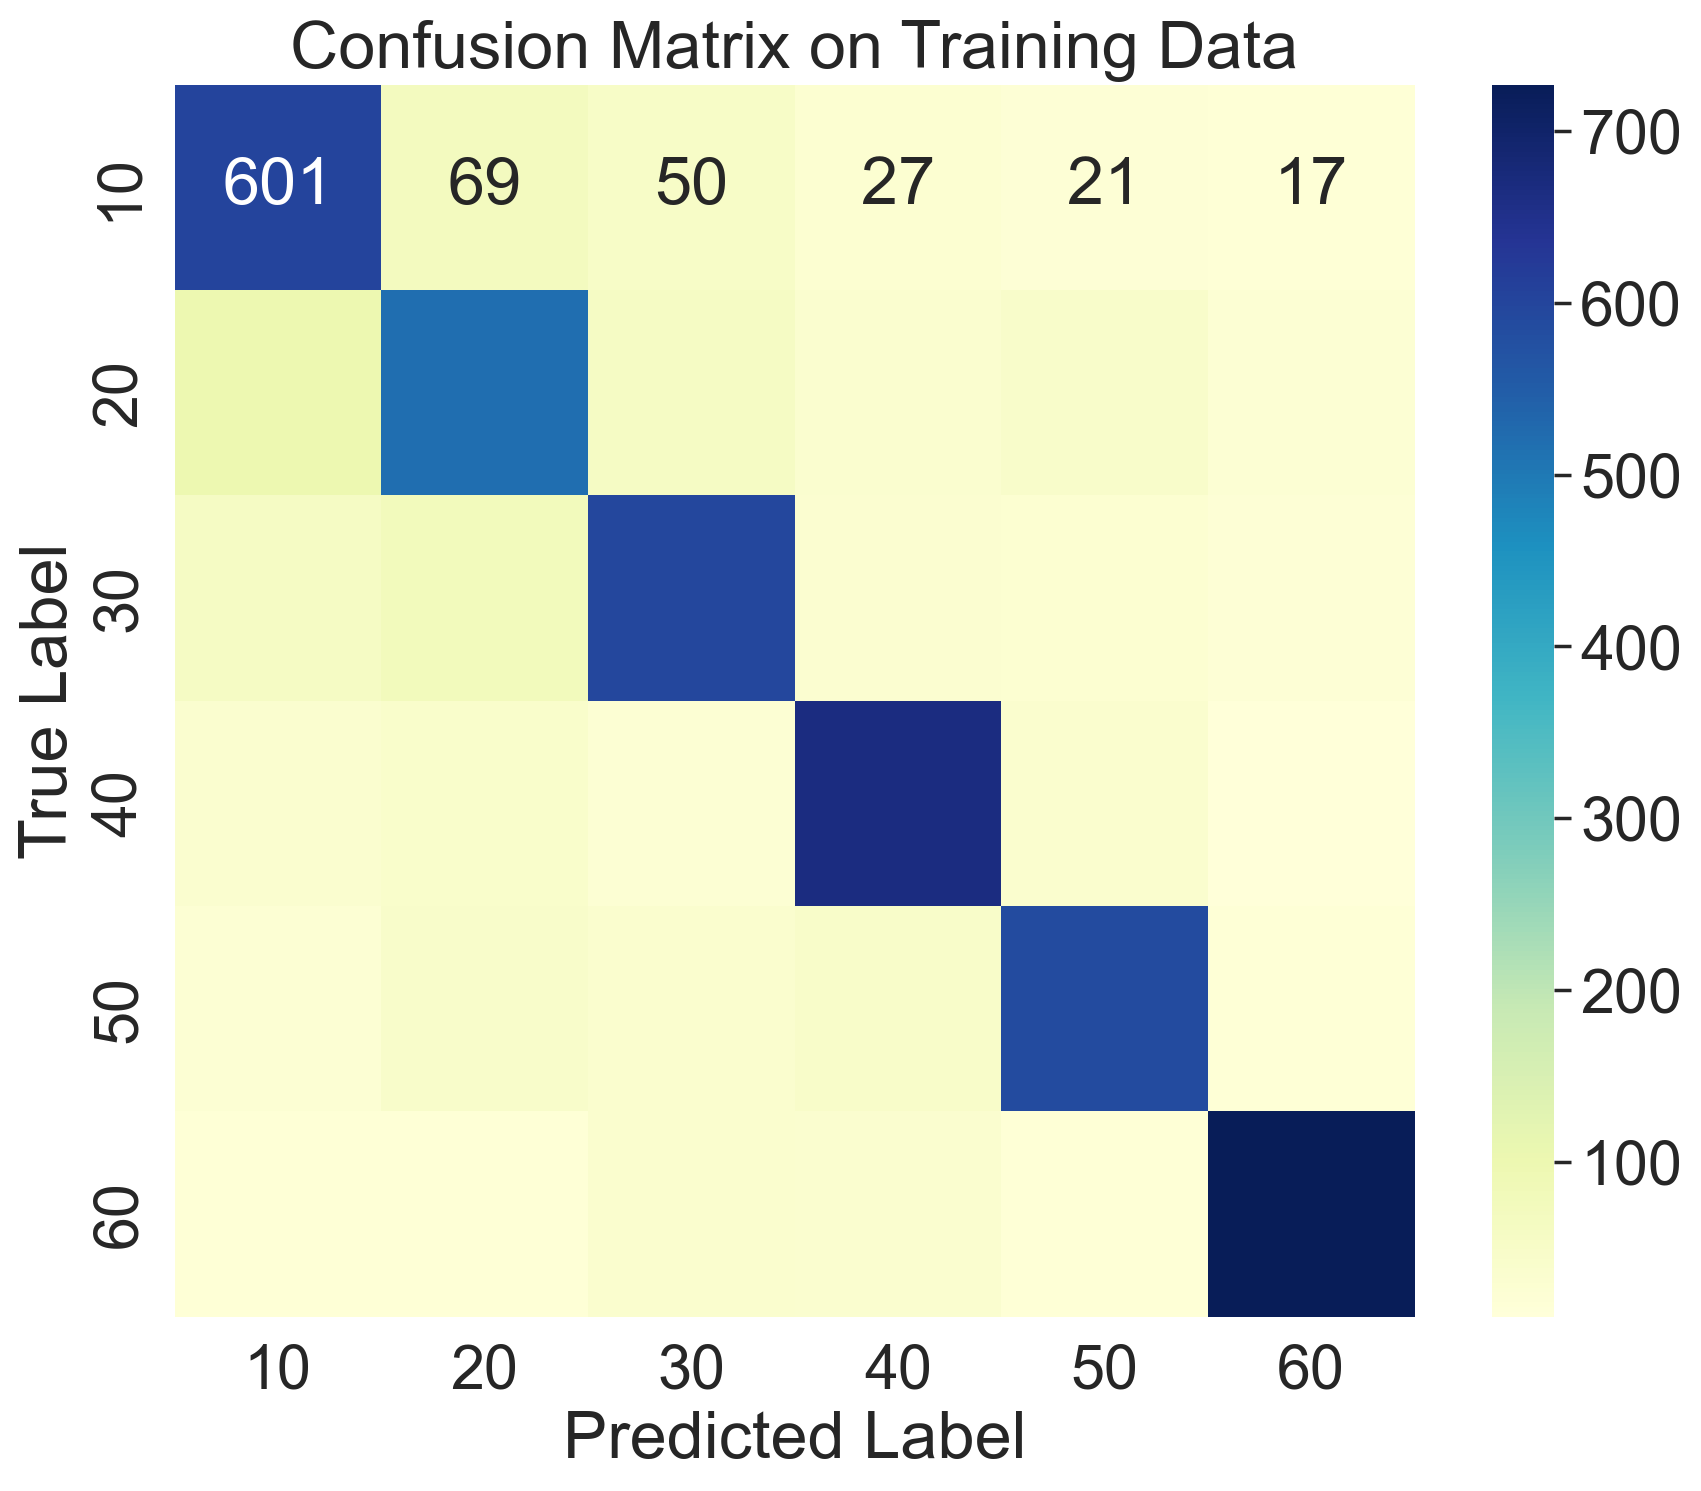

Accuracy   : 0.7704166666666666


In [158]:
train_hist_m4 = pd.DataFrame(lstm_results.history)
train_m4 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = rnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = rnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

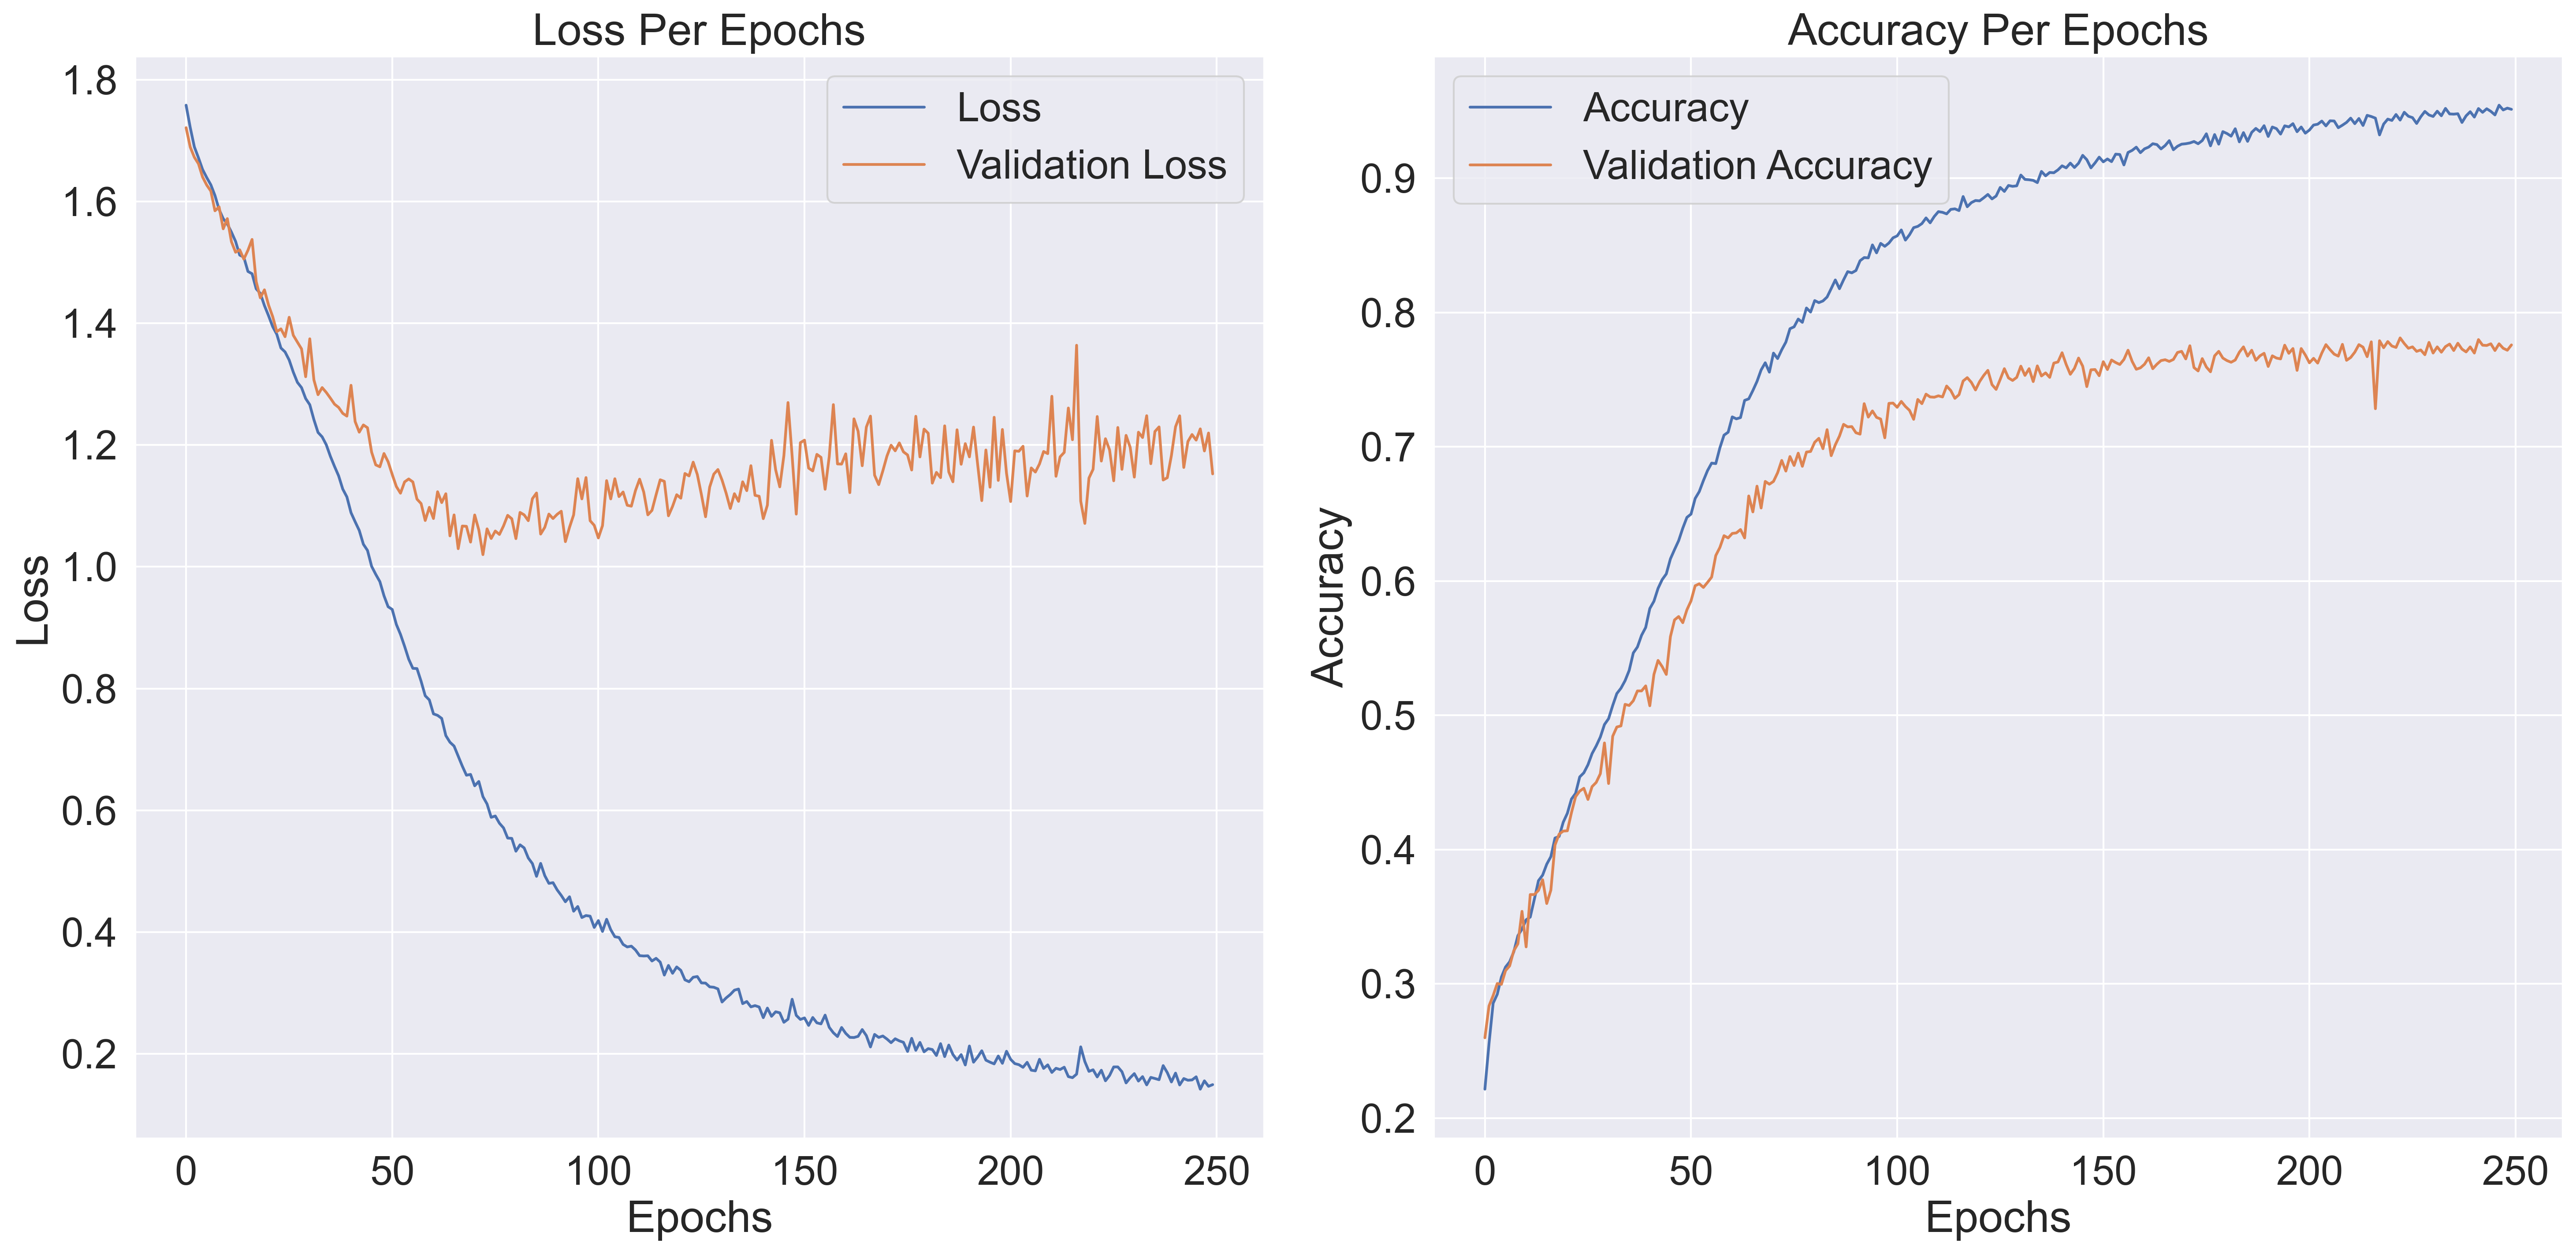

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m4[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m4[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()